In [144]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_text as pt
from IPython.display import Image
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [135]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df_train = pd.read_csv(r'D:\Dataset\HCI_Final_Project/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df_test = pd.read_csv(r'D:\Dataset\HCI_Final_Project/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [4]:
print(f'row: {df_train.shape[0]}')
print(f'columns: {df_train.shape[1]}')

row: 307511
columns: 122


In [5]:
categorical = df_train.select_dtypes(include='object')
numerical = df_train.select_dtypes(exclude='object')

col_categorical = categorical.columns.to_list()
col_numerical = numerical.columns.to_list()

In [6]:
df_train[col_categorical].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [7]:
df_train[col_numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.52,102790.18,100002.00,189145.50,278202.00,367142.50,4.562550e+05
TARGET,307511.0,0.08,0.27,0.00,0.00,0.00,0.00,1.000000e+00
CNT_CHILDREN,307511.0,0.42,0.72,0.00,0.00,0.00,1.00,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.92,237123.15,25650.00,112500.00,147150.00,202500.00,1.170000e+08
AMT_CREDIT,307511.0,599026.00,402490.78,45000.00,270000.00,513531.00,808650.00,4.050000e+06
AMT_ANNUITY,307499.0,27108.57,14493.74,1615.50,16524.00,24903.00,34596.00,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.21,369446.46,40500.00,238500.00,450000.00,679500.00,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.02,0.01,0.00,0.01,0.02,0.03,7.000000e-02
DAYS_BIRTH,307511.0,-16037.00,4363.99,-25229.00,-19682.00,-15750.00,-12413.00,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.05,141275.77,-17912.00,-2760.00,-1213.00,-289.00,3.652430e+05


In [8]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Exploratory Data Analysis (EDA)

In [10]:
df_train2 = df_train.copy()

In [11]:
df_train2['TARGET_DIFFICULTY'] = df_train2['TARGET'].apply(lambda x: 'No payment difficulty' if x == 0 else 'Payment difficulty')

In [12]:
target_grp = df_train2.groupby('TARGET_DIFFICULTY').agg(COUNT_CUST = ('TARGET_DIFFICULTY','count')).sort_values('COUNT_CUST', ascending=False)
target_grp.reset_index(inplace=True)

In [13]:
target_grp

,TARGET_DIFFICULTY,COUNT_CUST
0,No payment difficulty,282686
1,Payment difficulty,24825


In [14]:
target_grp['PERCENTAGE'] = round(target_grp['COUNT_CUST']/target_grp['COUNT_CUST'].sum()*100,2)
target_grp

,TARGET_DIFFICULTY,COUNT_CUST,PERCENTAGE
0,No payment difficulty,282686,91.93
1,Payment difficulty,24825,8.07


Text(0, 0.5, 'Percentage by Total Clients')

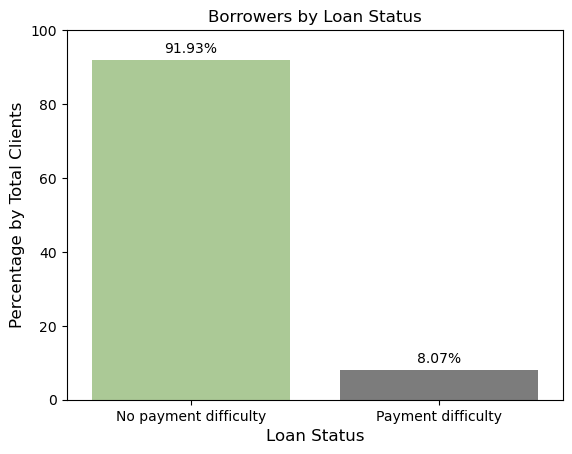

In [15]:
#plt.figure(figsize=(6,8))
temp_palette = {
    'No payment difficulty': '#A9D18E',
    'Payment difficulty': '#7C7C7C'
}

ax_diff = sns.barplot(x='TARGET_DIFFICULTY', y='PERCENTAGE', data=target_grp, palette=temp_palette)

pt.get_text(ax_diff,0.5,3)
    
plt.ylim(0, 100)

plt.title('Borrowers by Loan Status')
plt.xlabel('Loan Status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

# INSIGHT:
- Most of the borrowers experience no payment difficulty, which accounts for more than 90% of the total borrowers. This indicates a healthy situation for the company’s business, but still presents an opportunity to further increase the likelihood of borrowers not having payment difficulties for the remaining percentage.
- The ratio between borrowers who experience payment difficulty and those who don't is more than 1:4, which indicates that a heavily imbalanced dataset is used for analysis.

In [16]:
def loan_trend_group(col, target_col):
    df_col_grp = df_train2.groupby([target_col, col]).agg(Client_cnt = (target_col,'count')).sort_values('Client_cnt', ascending=False)
    df_col_grp.reset_index(inplace=True)
    
    df_col_grp['Percentage'] = round(df_col_grp['Client_cnt']/df_col_grp['Client_cnt'].sum()*100,2)
    
    return df_col_grp

def visualize_trend(object_col, target_col, chart_orientation, palette, chart_params):
    fig, ax = plt.subplots()

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    col_grp = loan_trend_group(object_col, target_col)
    
    if chart_orientation=='horizontal':
        ax_hbartype = sns.barplot(y=object_col, x='Percentage', hue=target_col,data=col_grp, palette=palette, orient='horizontal')

        pt.get_text_horz(ax_hbartype, **chart_params)
        plt.legend(loc='lower right')
        plt.xticks([])
    elif chart_orientation=='vertical':
        ax_hbartype_vert = sns.barplot(y='Percentage', x=object_col, hue=target_col,data=col_grp, palette=palette)

        pt.get_text(ax_hbartype_vert, **chart_params)

    for spine in ax.spines.values():
        spine.set_visible(False)
    
    #plt.xlim(0,60)
    plt.title(f"Client's loan status by {object_col}")
    plt.xlabel('Loans Status',fontsize=12)
    plt.ylabel('Percentage by Total Clients',fontsize=12)
    #plt.xticks([])
    
    plt.show()

In [17]:
def merged_grp(col):
    df_merge_grp = df_train2.groupby(col).agg(good_cnt=('TARGET_DIFFICULTY', lambda x: (x == 'No payment difficulty').sum())).sort_values('good_cnt', ascending=False)
    df_merge_grp.reset_index(inplace=True)
    
    df_merge_grp2 = df_train2.groupby(col).agg(bad_cnt=('TARGET_DIFFICULTY', lambda x: (x != 'No payment difficulty').sum())).sort_values('bad_cnt', ascending=False)
    df_merge_grp2.reset_index(inplace=True)

    merged_df = pd.merge(df_merge_grp, df_merge_grp2, on=col, how='outer').sort_values(by=['good_cnt'], ascending=False)
    
    merged_df['percentage_good'] = round(merged_df['good_cnt']/(merged_df['good_cnt']+merged_df['bad_cnt'])*100,2)
    merged_df['percentage_bad'] = round(merged_df['bad_cnt']/(merged_df['good_cnt']+merged_df['bad_cnt'])*100,2)

    return merged_df

def loans_dist_categories(object_col, avg_line=False, rotate_xticks=False, no_text=False, label_size_x=13):
    fig, ax = plt.subplots()

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    dist_df = merged_grp(object_col)

    dist_df = dist_df.sort_values('percentage_good', ascending=False)
    
    ax_dist_good = ax.bar(dist_df[object_col], dist_df['percentage_good'], color='#A9D18E')
    ax_dist_bad = ax.bar(dist_df[object_col], dist_df['percentage_bad'], bottom=dist_df['percentage_good'], color='grey')

    if no_text == False:
        for bar in ax_dist_good:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2, height/2,
                f'{round(height,2)}%', ha='center', va='center', color='black', fontsize=label_size_x
            )

        for bar in ax_dist_bad:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                f'{round(height,2)}%', ha='center', va='center', color='white', fontsize=label_size_x
            )
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    max_value = dist_df['percentage_good'].max()
    avg_value = dist_df['percentage_good'].mean()
    
    # Draw the reference line at the maximum value
    ax.axhline(max_value, color='white', linestyle='--', linewidth=2, label=f'Max Value: {round(max_value, 2)}%')
    
    if avg_line == True:
        ax.axhline(avg_value, color='#F7CA77', linestyle='--', linewidth=2, label=f'Max Value: {round(avg_value, 2)}%')
    
    plt.yticks([])
    plt.title(f"Client's loan status by {object_col}")
    plt.xlabel(f'{object_col}',fontsize=12)
    ax.tick_params(axis='x', labelsize=label_size_x)
    if rotate_xticks == True:
        plt.xticks(rotation=45)
    #plt.xticks([])

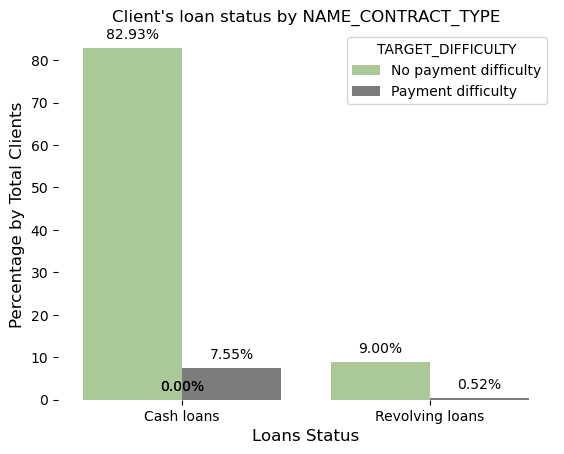

In [18]:
visualize_trend('NAME_CONTRACT_TYPE', 'TARGET_DIFFICULTY', 'vertical',temp_palette,{'x_pos':0.5, 'y_pos':3})

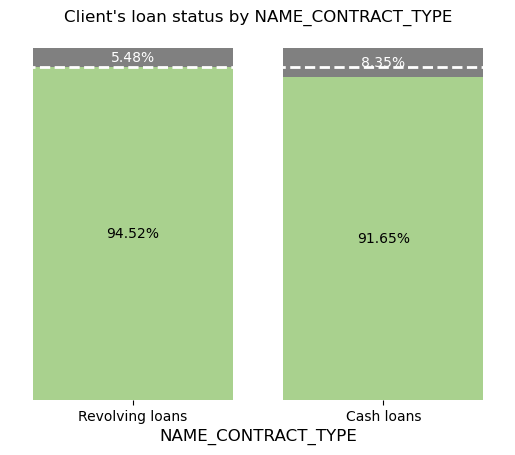

In [19]:
loans_dist_categories('NAME_CONTRACT_TYPE', False, False, False, 10)

# INSIGHT:
- Most of the borrowers choose cash loans by an overwhelming percentage of more than 90%, with around 7% of them experiencing difficulty in payment. This suggests that borrowers in this loan type should be prioritized in terms of future targeting efforts, as the majority of borrowers prefer this loan type.
- Although revolving loans account for less than 10% of the total borrowers, the rate of borrowers who are not experiencing difficulty in payment is higher than that of cash loans by about 3%. This indicates that diversifying efforts for this loan type could potentially bring positive results despite its small borrower percentage.

In [20]:
df_train2['CODE_GENDER'] = df_train2['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x).apply(lambda x: 'Female' if x=='F' else 'Male')

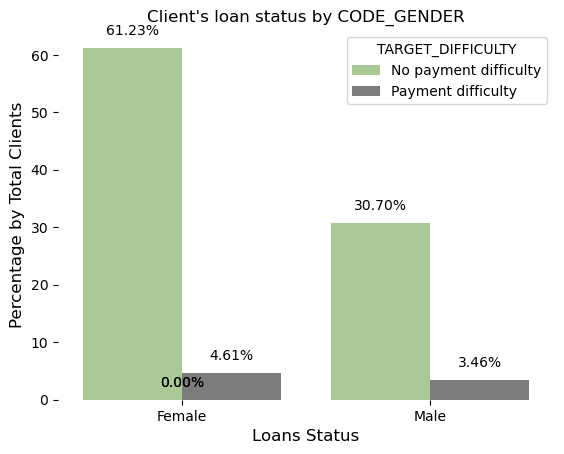

In [21]:
visualize_trend('CODE_GENDER','TARGET_DIFFICULTY', 'vertical',temp_palette,{'x_pos':0.5, 'y_pos':3})

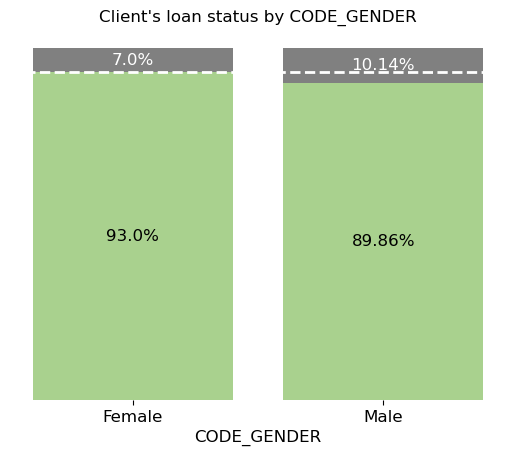

In [22]:
loans_dist_categories('CODE_GENDER', False, False, False, 12)

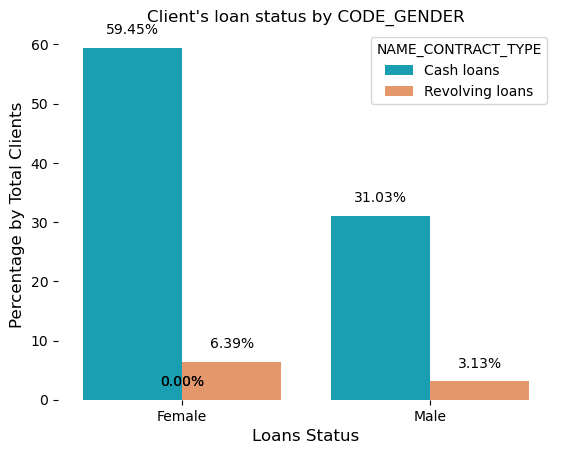

In [23]:
genderloan_palette = {
    'Cash loans': '#00B2CA',
    'Revolving loans': '#F79256'
}
visualize_trend('CODE_GENDER','NAME_CONTRACT_TYPE', 'vertical',genderloan_palette,{'x_pos':0.5, 'y_pos':3})

# INSIGHT:
- Female borrowers make up the majority of borrowers, accounting for more than 60% of the total borrowers, or double the percentage of male borrowers. The percentage of female borrowers applying for cash loans is almost the same as their overall percentage. This indicates that female borrowers strongly prefer cash loans, with only a small fraction of around 6% opting for other types of loans.
- Both female and male borrowers have a very high rate of loans not experiencing difficulty in payment, with female borrowers having a slightly higher rate by about 3%. The minimal difference between both groups suggests that gender might not be a direct indicator of a borrower's loan payment ability.
- There is a clear trend that shows cash loans are popular among both gender groups. It suggests that the preference for cash loans is not gender-specific, as both male and female borrowers show a strong inclination towards cash loans.

In [24]:
df_train2['FLAG_OWN_REALTY']=df_train2['FLAG_OWN_REALTY'].apply(lambda x: 'Own realty' if x=='Y' else 'Does not own realty')

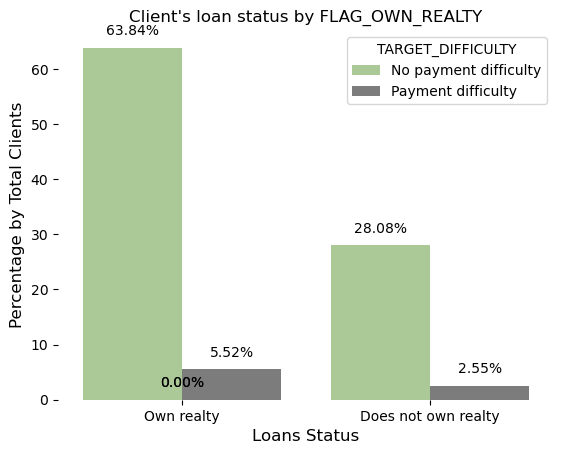

In [25]:
visualize_trend('FLAG_OWN_REALTY', 'TARGET_DIFFICULTY', 'vertical',temp_palette,{'x_pos':0.5, 'y_pos':3})

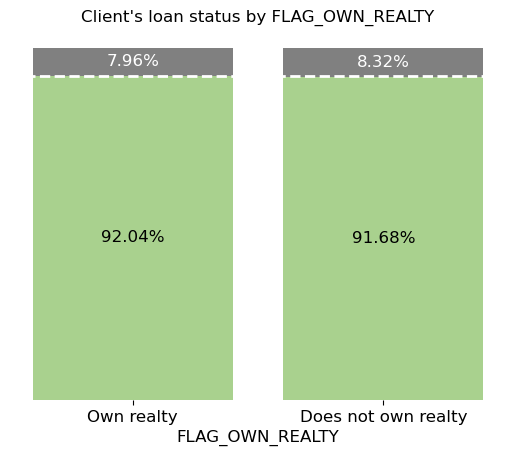

In [26]:
loans_dist_categories('FLAG_OWN_REALTY', False, False, False, 12)

# INSIGHT:
- Most of the borrowers own a property, which accounts for more than 69% of the total borrowers. Borrowers in this group are typically considered to be less risky, as owning valuable property can make it easier for them to secure a loan since it can be used as collateral. The high percentage of borrowers who own a property indicates that most of the company's borrower base should be able to repay their loans with a lower possibility of them turning into defaults.
- There is little to no difference between the rate of borrowers who do not experience payment difficulty, with only around 0.4% difference. This suggests that, in general, the ability of the company's borrower base to repay loans does not necessarily depend on whether they own property or not. The minimal difference also indicates that most borrowers might be at a financial status where the burden of taking loans does not significantly affect their financial condition.

In [27]:
df_train2['FLAG_OWN_CAR'] = df_train2['FLAG_OWN_CAR'].apply(lambda x: 'Own car' if x=='Y'else 'Does not own car')

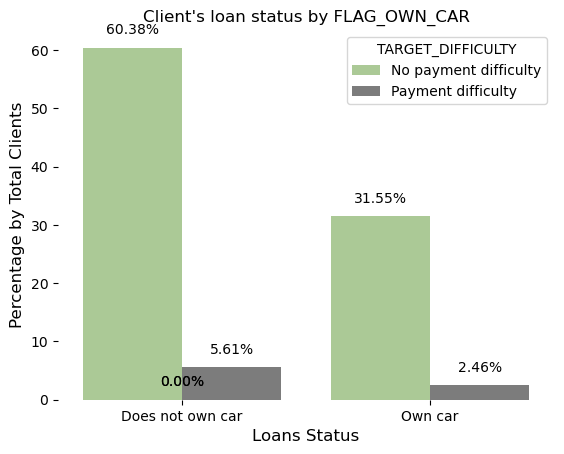

In [28]:
visualize_trend('FLAG_OWN_CAR', 'TARGET_DIFFICULTY', 'vertical',temp_palette,{'x_pos':0.5, 'y_pos':3})

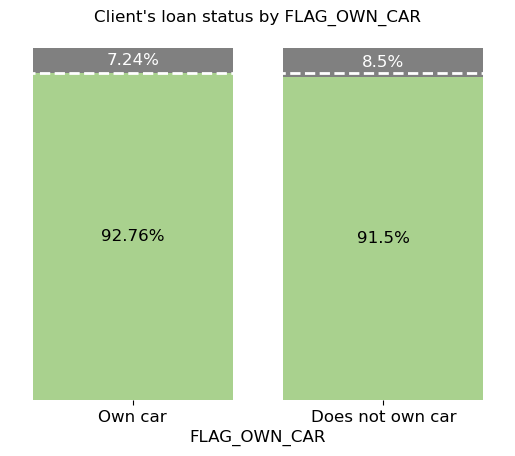

In [29]:
loans_dist_categories('FLAG_OWN_CAR', False, False, False, 12)

# INSIGHT:
- Most of the borrowers do not own a car, accounting for more than 65% of the total borrower base. Although borrowers without cars make up the majority, those who own a car have a slightly higher rate of borrowers who do not experience payment difficulties, by about 1%. Despite this difference, both groups of borrowers who own and those who do not own a car have a high rate of borrowers without payment difficulties, each exceeding 90%. This suggests that owning a car does not directly indicate a borrower's ability to repay loans, but it does point to a slightly lower risk of defaults and a less risky group.

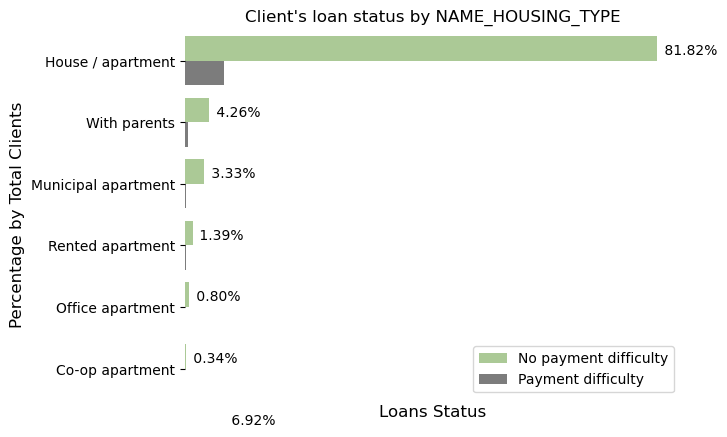

In [30]:
visualize_trend('NAME_HOUSING_TYPE', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

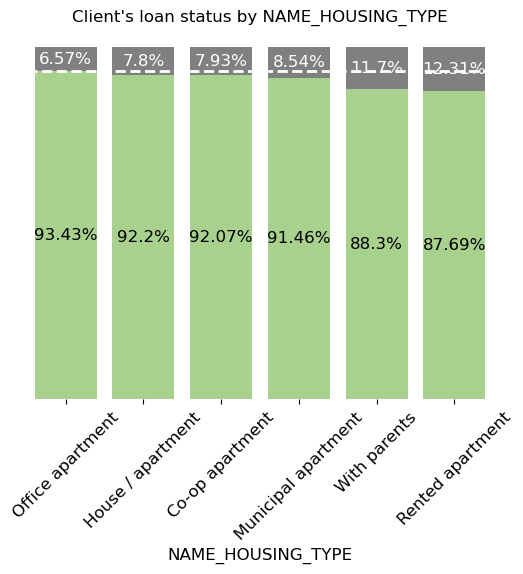

In [31]:
loans_dist_categories('NAME_HOUSING_TYPE', False, True, False, 12)

# INSIGHT:
- More than 80% of borrowers either own a house or an apartment, while the rest live in government-owned housing, office residences, shared residences, or with their parents.
- Despite the large difference between those who own a house or apartment and the rest, there is not much difference in the rate of borrowers without payment difficulties, with a peak rate of 93.43% for those living in office residences and a difference of only around 1-6%
- The minimal differences between the groups and high rates across the board suggest that home ownership plays a significant role in indicating a borrower's financial stability, but it can also be influenced by their housing arrangement.

In [32]:
def age_recategorization(df):
    df['AGE'] = abs(df['DAYS_BIRTH']/365)
    
    for index, row in df.iterrows():
        if row['AGE'] <=30:
            df.at[index, 'AGE'] = '20-30 Years old'
        elif row['AGE'] <=40:
            df.at[index, 'AGE'] = '31-40 Years old'
        elif row['AGE'] <=55:
            df.at[index, 'AGE'] = '41-55 Years old'
        else:
            df.at[index, 'AGE'] = 'Above 55 Years old'

age_recategorization(df_train2)

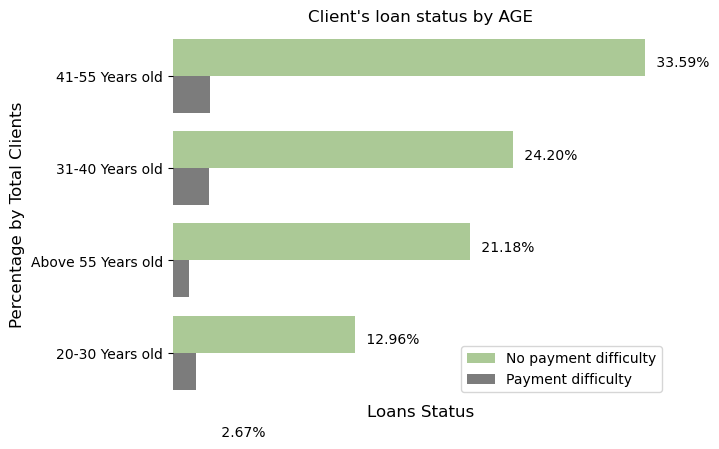

In [33]:
visualize_trend('AGE', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

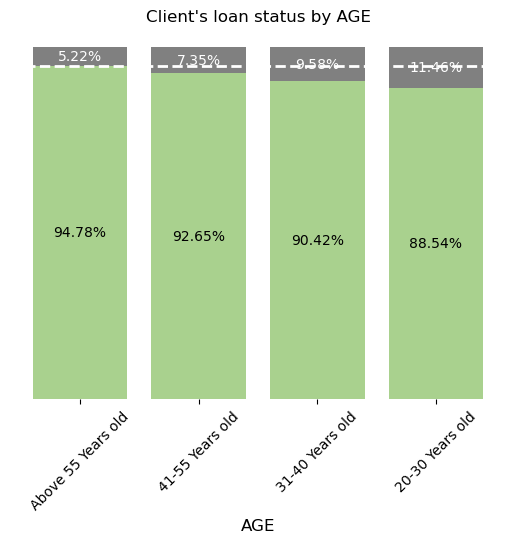

In [34]:
loans_dist_categories('AGE', False, True, False, 10)

# INSIGHT:
- Borrowers in the 45-55 age group account for the highest percentage of the total borrowers, making up more than 33%. Along with the size of this age group, the rate of borrowers without payment difficulties is also high at 92.65%.
- There is a clear downward trend in the rate of borrowers without payment difficulties, with those above 55 years old having the highest rate at 94.78%. The rate begins to drop by 2% as the age groups decrease, with the 20-30 age group having the lowest rate at around 88%.
- The trend suggests that older borrowers are less risky, as they are presumed to have higher financial stability, which enhances their ability to repay loans and results in a lower chance of experiencing payment difficulties.

In [35]:
df_train2['EMP_TENURE'] = abs(df_train2['DAYS_EMPLOYED']/365)

In [36]:
def tenure_recategorized(df):
    df['EMP_TENURE'] = abs(df['DAYS_EMPLOYED']/365)
    
    for index, row in df.iterrows():
        if row['EMP_TENURE'] <=1:
            df.at[index, 'EMP_TENURE'] = 'Short'
        elif row['EMP_TENURE'] <=5:
            df.at[index, 'EMP_TENURE'] = 'Medium'
        elif row['EMP_TENURE'] <=10:
            df.at[index, 'EMP_TENURE'] = 'Long'
        else:
            df.at[index, 'EMP_TENURE'] = 'Very Long'

tenure_recategorized(df_train2)

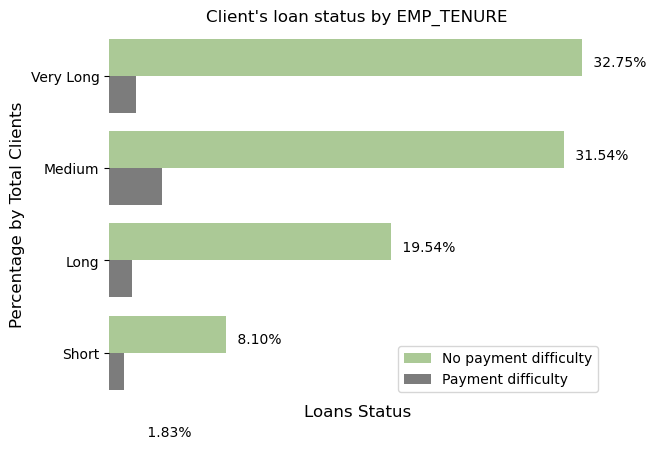

In [37]:
visualize_trend('EMP_TENURE', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

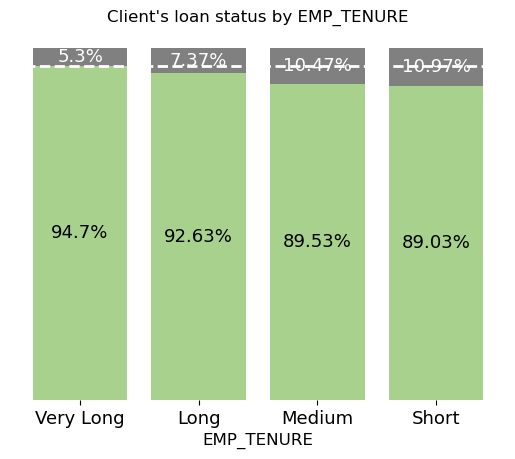

In [38]:
loans_dist_categories('EMP_TENURE', False, False, False, 13)

# INSIGHT:
- Borrowers with a medium length of employment, or those who have been employed for 2 to 5 years, make up more than 30% of the total borrowers, followed closely by those who have been employed for a long time, or 6 to 10 years. Having a borrower base that mostly consists of individuals with a stable source of income, along with a high rate of borrowers who do not experience payment difficulties, indicates that the current borrower base's risk in terms of income stability is fairly low.
- Disregarding the highly unusual employment lengths, there is a clear trend that shows the longer a borrower has been employed, the lower the possibility of them resulting in default loans or experiencing payment difficulties in general.

In [39]:
def occupation_recategorized(df):
    for index, row in df.iterrows():
        if row['OCCUPATION_TYPE'] in ['Laborers','Drivers','Cleaning staff','Cooking staff','Low-skill Laborers']:
            df.at[index, 'OCCUPATION_TYPE'] = 'Blue-Collar'
        else:
            df.at[index, 'OCCUPATION_TYPE'] = 'White-Collar'

occupation_recategorized(df_train2)

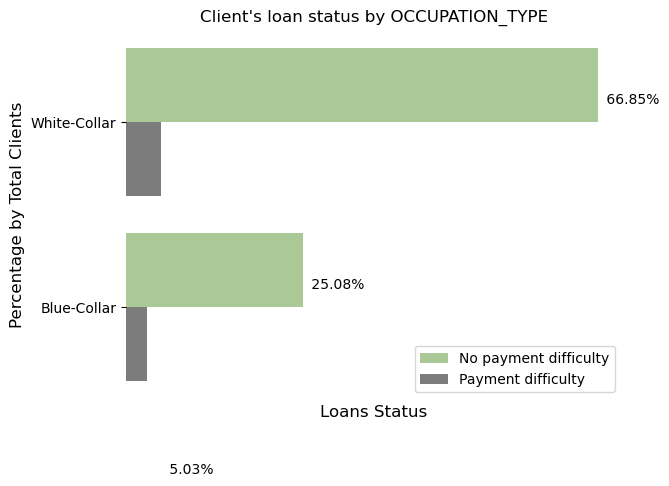

In [40]:
visualize_trend('OCCUPATION_TYPE', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

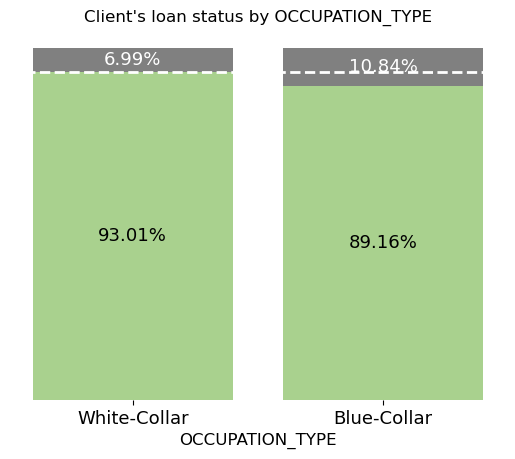

In [41]:
loans_dist_categories('OCCUPATION_TYPE', False, False, False, 13)

# INSIGHT:
- The majority of borrowers are those with white-collar occupations, accounting for about 67% of the total borrower base, while those with blue-collar occupations account for only about 1:4 of the borrower base. Relative to their size, those in white-collar occupations group have a higher rate of borrowers without payment difficulties by around 4% compared to blue-collar workers.
- Despite the significant size difference between the groups, the rate difference between white-collar and blue-collar borrowers is relatively small. This suggests that while white-collar borrowers may receive more favorable loan terms due to perceived lower risk, maintaining a diverse borrower base could help reduce overall risk.

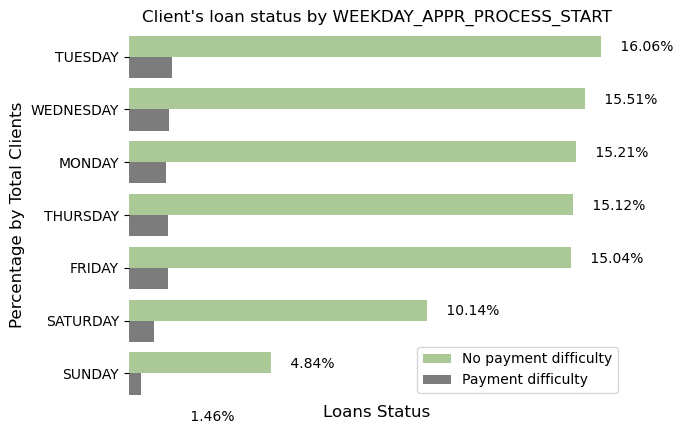

In [42]:
visualize_trend('WEEKDAY_APPR_PROCESS_START', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

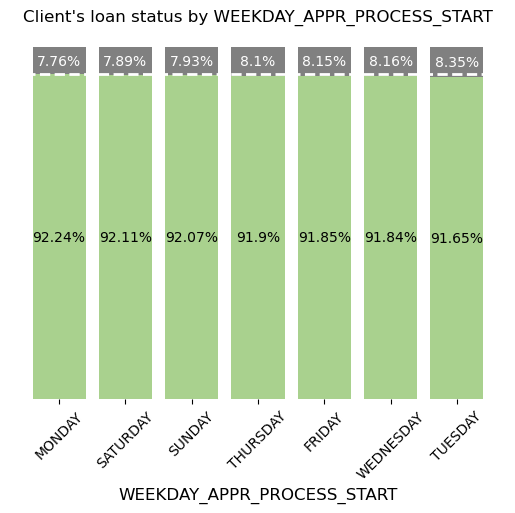

In [43]:
loans_dist_categories('WEEKDAY_APPR_PROCESS_START', False, True, False, 10)

### INSIGHT:
1. There is minimal difference in the number of applications processed each day of the week, indicating a healthy business process during active days from Monday to Friday. Tuesday has the highest total applications processed, accounting for around 17%.
2. The minimal difference in the rate of borrowers without payment difficulties suggests that the day of the week when an application is processed has little to no impact on a borrower's ability to repay their loans.

In [44]:
def children_recategorized(df):
    for index, row in df.iterrows():
        if row['CNT_CHILDREN'] == 0:
            df.at[index, 'CNT_CHILDREN'] = 'No Children'
        elif row['CNT_CHILDREN'] == 1:
            df.at[index, 'CNT_CHILDREN'] = '1 Children'
        elif row['CNT_CHILDREN'] <= 3:
            df.at[index, 'CNT_CHILDREN'] = '2-3 Children'
        else:
            df.at[index, 'CNT_CHILDREN'] = 'More than 3 Children'

children_recategorized(df_train2)

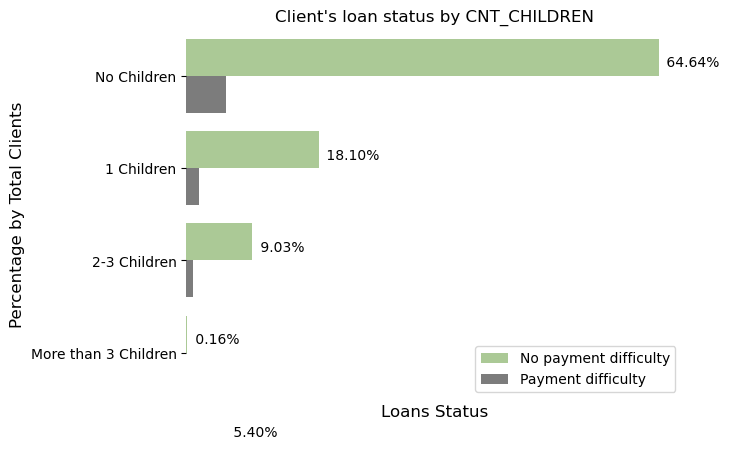

In [45]:
visualize_trend('CNT_CHILDREN', 'TARGET_DIFFICULTY', 'horizontal',temp_palette,{'x_pos':0.5, 'y_pos':-0.1, 'font_size':12, 'display':'partial'})

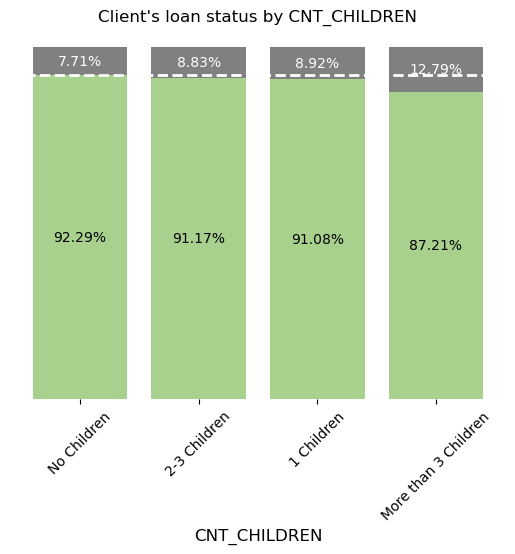

In [46]:
loans_dist_categories('CNT_CHILDREN', False, True, False, 10)

### INSIGHT:
- The majority of borrowers do not have children, accounting for more than 65% of the total borrower base. Despite this, there is only a slight difference in the rate of borrowers without payment difficulties between this group and those with 1 to 3 children. However, there is a noticeable difference in the rate for borrowers with more than 3 children, likely influenced by their small representation of just 0.16% of the total borrower base.
- There is a clear trend showing that borrowers without children are less likely to experience payment difficulties, as they are typically perceived to have more financial resources due to not needing to allocate those resources toward raising children. While the difference is not significant, borrowers with children are still somewhat more likely to encounter payment difficulties.

# Data Preprocessing

## Duplicate rows

In [47]:
df_train.duplicated().sum()

0

- There is no duplicates found in the dataset.

## Missing Values

In [48]:
#Even though in EDA we consider 0 : No payment difficulty, and 1 : Payment difficulty
#But we need to change target value, because in score card, the higher the better
#0 : bad loan, 1: good loan

df_train['TARGET'] = df_train['TARGET'].apply(lambda x: 1 if x==0 else 0)

In [49]:
X = df_train.drop(columns='TARGET', axis=1)
y = df_train['TARGET']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 121), (61503, 121), (246008,), (61503,))

In [51]:
miscol_temp = pd.DataFrame(columns=['Columns','Num_train'])
miscol_temp_test = pd.DataFrame(columns=['Columns','Num_test'])

In [52]:
for col in X_train.columns:
    col_misval_train = round(X_train[col].isna().sum()/X_train.shape[0]*100,3)
    if col_misval_train > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval_train]
        
for col in X_test.columns:
    col_misval_test = round((X_test[col].isna().sum()/X_test.shape[0])*100,3)
    if col_misval_test > 0:
        miscol_temp_test.loc[len(miscol_temp_test)] = [col, col_misval_test]

In [53]:
# merge the two dataset
merged_misval_df = pd.merge(miscol_temp, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)

filtered_keep = merged_misval_df[merged_misval_df['Num_train']<50]
filtered_drop = merged_misval_df[merged_misval_df['Num_train']>=50]

In [54]:
filtered_drop.shape

(41, 3)

In [55]:
merged_misval_df['Columns'].value_counts().sum()

64

In [56]:
filtered_keep.sort_values('Num_test', ascending=False)

,Columns,Num_train,Num_test
42,FLOORSMAX_MEDI,49.733,49.872
14,FLOORSMAX_AVG,49.733,49.872
28,FLOORSMAX_MODE,49.733,49.872
37,YEARS_BEGINEXPLUATATION_MEDI,48.759,48.869
23,YEARS_BEGINEXPLUATATION_MODE,48.759,48.869
9,YEARS_BEGINEXPLUATATION_AVG,48.759,48.869
51,TOTALAREA_MODE,48.242,48.377
53,EMERGENCYSTATE_MODE,47.363,47.539
3,OCCUPATION_TYPE,31.298,31.537
6,EXT_SOURCE_3,19.938,19.376


#### There are a total of 23 columns with missing values that are below threshold
- The columns with missing values will be addressed according to each of its corresponding type.

In [57]:
filtered_drop_list = filtered_drop['Columns'].tolist()
X_train = X_train.drop(columns=filtered_drop_list)
X_test = X_test.drop(columns=filtered_drop_list)

In [58]:
for index, row in filtered_keep.iterrows():
    curr_col = row['Columns']
    if X_train[curr_col].dtypes == 'object':
        train_impute_value_cat = X_train[curr_col].mode()[0]
        test_impute_value_cat = X_test[curr_col].mode()[0]
        
        X_train[curr_col] = X_train[curr_col].fillna(train_impute_value_cat)
        X_test[curr_col] = X_test[curr_col].fillna(test_impute_value_cat)
    else:
        train_impute_value_num = X_train[curr_col].mean()
        test_impute_value_num = X_test[curr_col].mean()
        
        X_train[curr_col] = X_train[curr_col].fillna(train_impute_value_num)
        X_test[curr_col] = X_test[curr_col].fillna(test_impute_value_num)

In [59]:
def impute_misval(df):
    for val in df:
        if df[val].isna().sum() > 0:
            df[val] = df[val].fillna(df[val].mean())
            
impute_misval(X_train)
impute_misval(X_test)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 80), (61503, 80), (246008,), (61503,))

## Feature Transformation

In [61]:
X_train.select_dtypes(include='object').describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
count,246008,246008,246008,246008,246008,246008,246008,246008,246008,246008,246008,246008,246008
unique,2,3,2,2,7,8,5,6,6,18,7,58,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,No
freq,222502,161817,162139,170705,199989,126988,174801,157088,218109,121340,43296,54283,244152


In [62]:
X_train.select_dtypes(exclude='object').describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,2.460080e+05,2.460080e+05,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.00000,246008.000000,246008.000000,246008.000000,246008.00000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000
mean,278046.436165,0.417604,1.689317e+05,5.986812e+05,27104.155090,5.380867e+05,0.020864,-16032.414657,63649.532040,-4981.165056,-2994.543803,0.999996,0.820331,0.199428,0.998175,0.280727,0.056856,2.153248,2.053116,2.032064,12.060376,0.014878,0.050563,0.040584,0.077993,0.230362,0.179437,5.142526e-01,0.510931,0.977651,0.226289,0.976980,0.222361,0.977667,0.225917,0.102540,1.422310,0.143666,1.405401,0.100117,-962.998939,0.000045,0.709469,0.000093,0.015008,0.087591,0.000179,0.081871,0.004020,0.000024,0.003898,0.000004,0.003557,0.00291,0.001232,0.009959,0.000256,0.00815,0.000610,0.000524,0.000333,0.006309,0.006869,0.034149,0.267814,0.266276,1.900437
std,102862.172911,0.723098,2.603398e+05,4.020834e+05,14496.821105,3.689717e+05,0.013833,4363.308142,141139.224179,3522.991873,1510.099884,0.002016,0.383912,0.399572,0.042683,0.449355,0.231567,0.911219,0.508773,0.502285,3.266239,0.121063,0.219105,0.197325,0.268162,0.421066,0.383719,1.909152e-01,0.174340,0.042906,0.102646,0.046756,0.101990,0.043396,0.102968,0.077289,2.413751,0.447376,2.392125,0.362003,827.273308,0.006687,0.454008,0.009669,0.121583,0.282699,0.013373,0.274169,0.063278,0.004939,0.062314,0.002016,0.059533,0.05387,0.035074,0.099297,0.016001,0.08991,0.024685,0.022893,0.018254,0.076840,0.101009,0.189521,0.854485,0.775746,1.737067
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.500000e+04,0.000290,-25229.000000,-17531.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [63]:
X_train['CODE_GENDER'] = X_train['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x)
X_test['CODE_GENDER'] = X_test['CODE_GENDER'].apply(lambda x: 'F' if x=='XNA' else x)

In [64]:
def income_type_recategorized(df):
    type_change = ['Unemployed','Student','Maternity leave']
    for index, row in df.iterrows():
        if row['NAME_INCOME_TYPE'] in type_change:
            df.at[index, 'NAME_INCOME_TYPE'] = 'Other'
        elif row['NAME_INCOME_TYPE'] == 'Businessman':
            df.at[index, 'NAME_INCOME_TYPE'] = 'Working'

income_type_recategorized(X_train)
income_type_recategorized(X_test)

In [65]:
X_train['NAME_FAMILY_STATUS'] = X_train['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x=='Unknown' else x)
X_test['NAME_FAMILY_STATUS'] = X_test['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x=='Unknown' else x)

In [66]:
occupation_recategorized(X_train)
occupation_recategorized(X_test)

In [67]:
children_recategorized(X_train)
children_recategorized(X_test)

In [68]:
age_recategorization(X_train)
age_recategorization(X_test)

X_train = X_train.drop(columns=['DAYS_BIRTH'])
X_test = X_test.drop(columns=['DAYS_BIRTH'])

In [69]:
tenure_recategorized(X_train)
tenure_recategorized(X_test)

X_train = X_train.drop(columns=['DAYS_EMPLOYED'])
X_test = X_test.drop(columns=['DAYS_EMPLOYED'])

In [70]:
categorized_data = {
    "Public Sector & Government": ['Government', 'Military', 'Police', 'Emergency', 'Postal'],
    "Education & Training": ['School', 'University', 'Kindergarten'],
    "Healthcare": ['Medicine'],
    "Finance & Real Estate": ['Bank', 'Insurance', 'Realtor', 'Housing'],
    "Construction & Industry": ['Construction', 'Industry', 'Electricity'],
    "Agriculture & Environment": ['Agriculture'],
    "Technology & Telecom": ['Telecom', 'Mobile'],
    "Trade & Retail": ['Trade', 'Business', 'Selfemployed'],
    "Hospitality & Food Services": ['Restaurant', 'Hotel'],
    "Arts, Culture & Media": ['Culture', 'Advertising'],
    "Personal Services": ['Cleaning', 'Security', 'Religion', 'Legal', 'Services'],
    "Transportation & Logistics": ['Transport'],
    "Other": ['Other']
}

def organization_recategorization(df):
    df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Other' if x=='XNA' else x)

    df['ORGANIZATION_TYPE_RECAT'] = df['ORGANIZATION_TYPE'].str.split().str[0].str.replace(r'[^\w]', '', regex=True)
    df = df.drop(columns=['ORGANIZATION_TYPE'])

    return df
    
def cardinality_reduction(df):
    df_temp = organization_recategorization(df)
    
    category_mapping = {org: category for category, org_list in categorized_data.items() for org in org_list}
    
    df_temp['ORGANIZATION_TYPE_RECAT'] = df_temp['ORGANIZATION_TYPE_RECAT'].map(category_mapping)

    return df_temp
        

X_train = cardinality_reduction(X_train)
X_test = cardinality_reduction(X_test)

In [71]:
X_train['ORGANIZATION_TYPE_RECAT'].unique()

array(['Trade & Retail', 'Other', 'Finance & Real Estate',
       'Public Sector & Government', 'Hospitality & Food Services',
       'Education & Training', 'Personal Services',
       'Transportation & Logistics', 'Construction & Industry',
       'Healthcare', 'Agriculture & Environment', 'Technology & Telecom',
       'Arts, Culture & Media'], dtype=object)

In [72]:
days_feature = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for val in days_feature:
    X_train[val] = abs(X_train[val]/365)
    X_test[val] = abs(X_test[val]/365)

## Categorical Feature Selection
- p-value < 0.05
- Unique value > 1

In [73]:
x_train_cat = X_train.select_dtypes(include='object')
x_train_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'EMERGENCYSTATE_MODE',
       'AGE', 'EMP_TENURE', 'ORGANIZATION_TYPE_RECAT'],
      dtype='object')

In [74]:
# chi-squared test is chosen because dataset doesn't have normal distribution
chi_2 = {}

#dictionary.setdefault(key, default_value)
#key: The key you want to look for in the dictionary.
#default_value: The value to be set for the key if the key is not present in the dictionary
for col in x_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, x_train_cat[col]))
    chi_2.setdefault('Feature',[]).append(col)
    chi_2.setdefault('p-value',[]).append(round(p,8))
    
#create dataframe from dictionary
df_chi_2 = pd.DataFrame(data=chi_2)

In [75]:
df_chi_2

,Feature,p-value
0,NAME_CONTRACT_TYPE,0.000000
1,CODE_GENDER,0.000000
2,FLAG_OWN_CAR,0.000000
3,FLAG_OWN_REALTY,0.000315
4,CNT_CHILDREN,0.000000
5,NAME_TYPE_SUITE,0.000016
6,NAME_INCOME_TYPE,0.000000
7,NAME_EDUCATION_TYPE,0.000000
8,NAME_FAMILY_STATUS,0.000000
9,NAME_HOUSING_TYPE,0.000000


In [76]:
#extract unique for categorical column
cat_unique = x_train_cat.describe().T.reset_index()
cat_unique.rename(columns={'index':'Feature'}, inplace=True)

In [77]:
#merge 2 dataset
merge_chi_2 = pd.merge(df_chi_2, cat_unique, on='Feature', how='inner').sort_values(by=['p-value', 'unique'])

#display merge dataset
merge_chi_2

,Feature,p-value,count,unique,top,freq
0,NAME_CONTRACT_TYPE,0.000000,246008,2,Cash loans,222502
1,CODE_GENDER,0.000000,246008,2,F,161819
2,FLAG_OWN_CAR,0.000000,246008,2,N,162139
10,OCCUPATION_TYPE,0.000000,246008,2,Blue-Collar,146347
4,CNT_CHILDREN,0.000000,246008,4,No Children,172200
13,AGE,0.000000,246008,4,41-55 Years old,89223
14,EMP_TENURE,0.000000,246008,4,Medium,86800
6,NAME_INCOME_TYPE,0.000000,246008,5,Working,126993
7,NAME_EDUCATION_TYPE,0.000000,246008,5,Secondary / secondary special,174801
8,NAME_FAMILY_STATUS,0.000000,246008,5,Married,157089


- There will be no feature dropped based on their p-value and their unique value.

In [78]:
selected_cat_list = X_train.select_dtypes(include='object').columns.to_list()

## Numerical Feature Selection
- p-value < 0.05
- Correlation value < 0.7

In [79]:
# Create new dataframe without column with dtypes 'object'
x_train_num = X_train.select_dtypes(exclude='object')
x_train_num.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',

In [80]:
# Use ANOVA to get the p-value
F_statistic, p_values = f_classif(x_train_num, y_train)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

df_anova.shape

(64, 2)

In [81]:
df_anova

,Numerical Feature,p-value
0,SK_ID_CURR,0.05893
1,AMT_INCOME_TOTAL,0.24624
2,AMT_CREDIT,0.00000
3,AMT_ANNUITY,0.00000
4,AMT_GOODS_PRICE,0.00000
5,REGION_POPULATION_RELATIVE,0.00000
6,DAYS_REGISTRATION,0.00000
7,DAYS_ID_PUBLISH,0.00000
8,FLAG_MOBIL,0.76697
9,FLAG_EMP_PHONE,0.00000


In [82]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()

print(f'Number of excluded columns: {len(df_anova)-len(temp_num_cols)}')

temp_num_cols

Number of excluded columns: 18


['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18

- 18 features are dropped because their p-value is more than the threshold (0.05)

<Axes: >

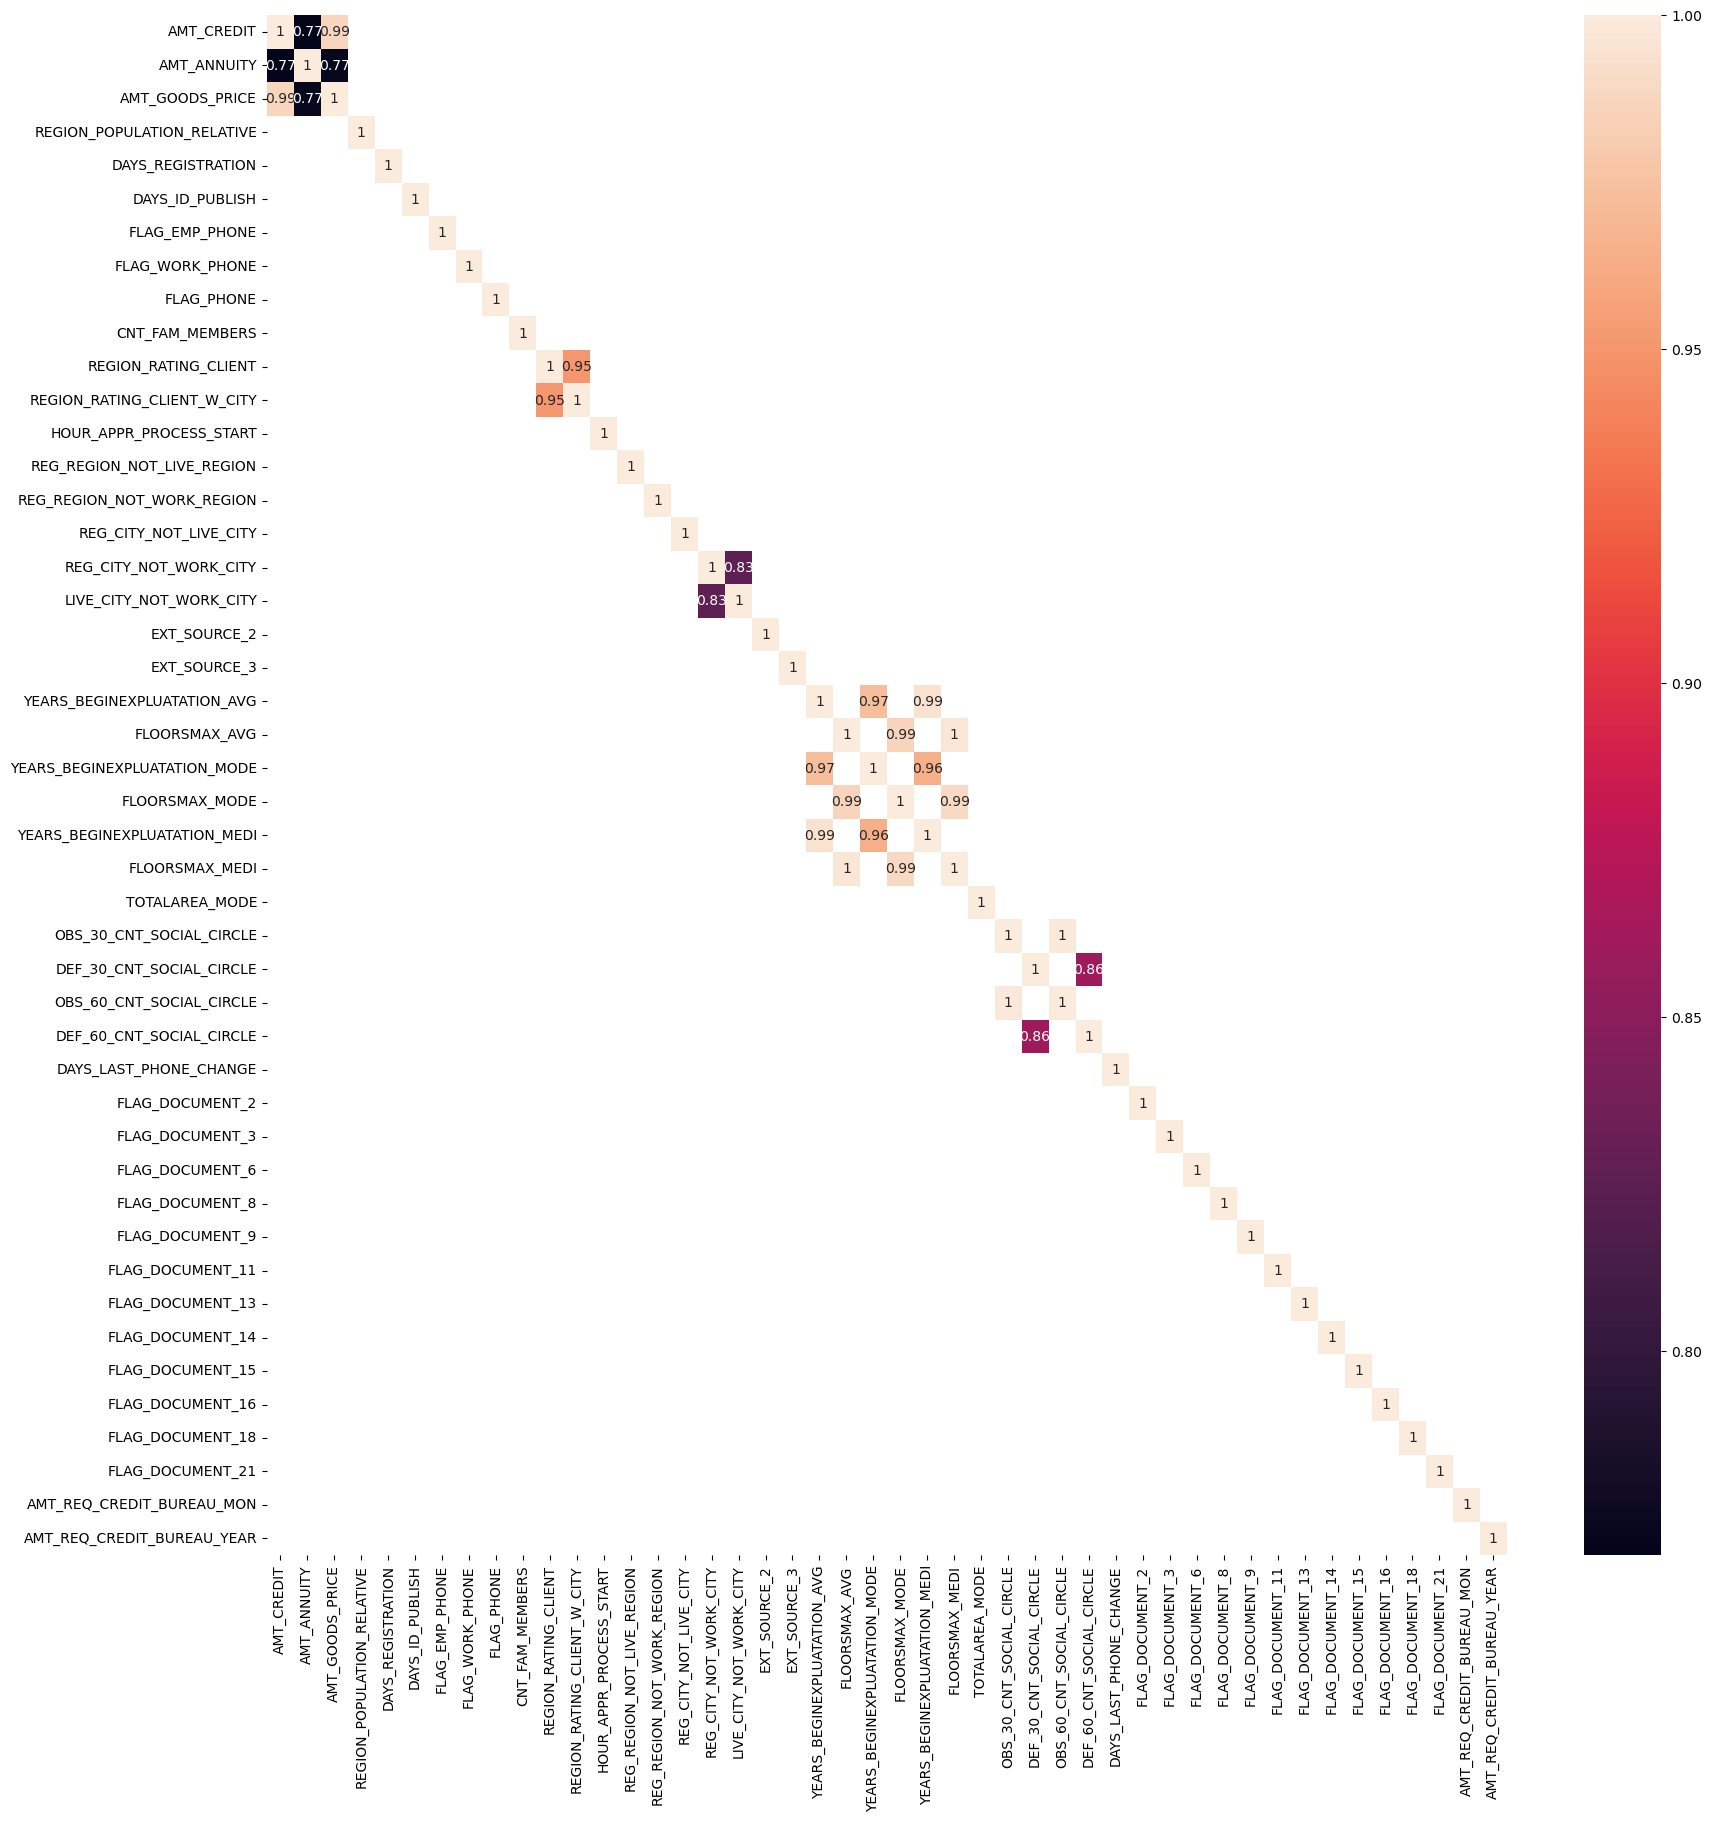

In [83]:
#select only the columns with correlation < 0.7
corr = X_train[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))

# create heatmap to show correlation between features
sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [84]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [85]:
corr_selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]

print(f'Number of excluded columns: {len(temp_num_cols)-len(corr_selected_col)}')

corr_selected_col

Number of excluded columns: 3


['REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_MON

- 3 features are dropped because their correlation value is more than the 0.7 threshold criterion.

In [86]:
num_unique = X_train[corr_selected_col].nunique()
df_num_unique= pd.DataFrame(data=num_unique).reset_index().rename(columns={'index':'Feature', 0:'unique'})

select_num_unique = df_num_unique[df_num_unique['unique']>2]
select_num_unique

,Feature,unique
0,REGION_POPULATION_RELATIVE,81
1,DAYS_REGISTRATION,15399
2,DAYS_ID_PUBLISH,6140
6,CNT_FAM_MEMBERS,17
7,REGION_RATING_CLIENT,3
8,REGION_RATING_CLIENT_W_CITY,3
9,HOUR_APPR_PROCESS_START,24
15,EXT_SOURCE_2,108868
16,EXT_SOURCE_3,804
17,YEARS_BEGINEXPLUATATION_AVG,265


In [87]:
select_num_unique.shape

(23, 2)

In [88]:
list_select_num_unique = select_num_unique['Feature'].tolist()
list_select_num_unique

['REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [89]:
#drop some value that have same meaning
drop_value = [
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

select_num_final = [value for value in list_select_num_unique if value not in drop_value]
len(select_num_final), select_num_final

(7,
 ['REGION_POPULATION_RELATIVE',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'REGION_RATING_CLIENT_W_CITY',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'DAYS_LAST_PHONE_CHANGE'])

In [90]:
selected_features = select_num_final + selected_cat_list
selected_features_alt = selected_features + ['AMT_CREDIT']

X_test_alt = X_test[selected_features_alt]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [91]:
X_train.shape, X_test.shape

((246008, 23), (61503, 23))

## Encoding

### One-Hot Encoding
- Categorical columns are encoded using one-hot encoding to convert them into numerical columns with values of 0 and 1.

In [92]:
X_train.select_dtypes(include='object').describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,246008,2,Cash loans,222502
CODE_GENDER,246008,2,F,161819
FLAG_OWN_CAR,246008,2,N,162139
FLAG_OWN_REALTY,246008,2,Y,170705
CNT_CHILDREN,246008,4,No Children,172200
NAME_TYPE_SUITE,246008,7,Unaccompanied,199989
NAME_INCOME_TYPE,246008,5,Working,126993
NAME_EDUCATION_TYPE,246008,5,Secondary / secondary special,174801
NAME_FAMILY_STATUS,246008,5,Married,157089
NAME_HOUSING_TYPE,246008,6,House / apartment,218109


In [93]:
columns_to_encode = X_train.select_dtypes(include='object').columns

list_drop = ['CNT_CHILDREN', 'WEEKDAY_APPR_PROCESS_START', 'AGE', 'EMP_TENURE']
columns_to_encode = columns_to_encode.drop(list_drop) # 'grade' and 'sub_grade' are excluded due to their ordinal values

In [94]:
columns_to_encode

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'EMERGENCYSTATE_MODE', 'ORGANIZATION_TYPE_RECAT'],
      dtype='object')

In [95]:
from sklearn.preprocessing import OneHotEncoder

X_train_to_encode = X_train[columns_to_encode]
X_train_rest = X_train.drop(columns=columns_to_encode)

X_test_to_encode = X_test[columns_to_encode]
X_test_rest = X_test.drop(columns=columns_to_encode)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoder.fit(X_train_to_encode)

X_train_encoded = encoder.transform(X_train_to_encode).toarray()
X_test_encoded = encoder.transform(X_test_to_encode).toarray()

encoded_columns = encoder.get_feature_names_out(columns_to_encode)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train_enc = pd.concat([X_train_rest, X_train_encoded_df], axis=1)
X_test_enc = pd.concat([X_test_rest, X_test_encoded_df], axis=1)

In [96]:
X_train.shape, X_test.shape, X_train_enc.shape, X_test_enc.shape

((246008, 23), (61503, 23), (246008, 52), (61503, 52))

### Ordinal Encoder
- Ordinal Encoder is used for some features to preserve their ordinal nature.
- There are 4 features that will be encoded with this technique, which is (CNT_CHILDREN, WEEKDAY_APPR_PROCESS_START, AGE, EMP_TENURE)

In [97]:
ordinal_dict = {
    "CNT_CHILDREN": ['No Children', '1 Children', '2-3 Children', 'More than 3 Children'],
    "WEEKDAY_APPR_PROCESS_START": ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'],
    "AGE": ['20-30 Years old', '31-40 Years old', '41-55 Years old', 'Above 55 Years old'],
    "EMP_TENURE": ['Short', 'Medium', 'Long', 'Very Long']
}

def ordinal_encoding(df, category_list, feature):
    ordinal_encoder = OrdinalEncoder(categories=[category_list])
    
    df[f'{feature}_encoded'] = ordinal_encoder.fit_transform(df[[feature]])
    df[f'{feature}_encoded'] = df[f'{feature}_encoded'].astype(int)
    
    df = df.drop(columns=[feature])

    return df

for feature, recat_order in ordinal_dict.items():
    X_train_enc = ordinal_encoding(X_train_enc, recat_order, feature)
    X_test_enc = ordinal_encoding(X_test_enc, recat_order, feature)

## Handling Outliers

In [98]:
df_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
df_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [99]:
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100
    
    return outlier_percentage

In [100]:
def outliers(df):
    outlier_percentages = {}
    for col in df.select_dtypes(exclude='bool').columns:
        outlier_percentages[col] = calculate_outlier_percentage(df[col])
    
    # Convert to a DataFrame for easier viewing
    outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage']).sort_values('Outlier Percentage', ascending=False)
    outlier_df.reset_index(inplace=True)
    outlier_df.rename(columns={'index': 'Features'}, inplace=True)

    return outlier_df

train_outliers = outliers(X_train_enc)
test_outliers = outliers(X_test_enc)

In [101]:
binary_columns = [col for col in X_train_enc.columns if X_train_enc[col].isin([0, 1]).all()]
numerical_columns = [col for col in X_train_enc.columns if col not in binary_columns and col in selected_features]

merged_outlier_df = pd.merge(train_outliers, test_outliers, on='Features', how='inner').sort_values(by=['Outlier Percentage_x'], ascending=False)
merged_outlier_df = merged_outlier_df[merged_outlier_df['Features'].isin(numerical_columns) & (merged_outlier_df['Outlier Percentage_y']>0)]
merged_outlier_df.round(2)

,Features,Outlier Percentage_x,Outlier Percentage_y
0,REGION_RATING_CLIENT_W_CITY,25.33,25.54
21,REGION_POPULATION_RELATIVE,2.75,2.69
25,EXT_SOURCE_3,1.41,1.12
34,DAYS_REGISTRATION,0.21,0.23
36,DAYS_LAST_PHONE_CHANGE,0.14,0.14


In [102]:
X_train_enc[numerical_columns] = X_train_enc[numerical_columns].apply(lambda x: np.log1p(x))
X_test_enc[numerical_columns] = X_test_enc[numerical_columns].apply(lambda x: np.log1p(x))

In [103]:
train_outliers_transformed = outliers(X_train_enc)
test_outliers_transformed  = outliers(X_test_enc)

In [104]:
# merge the two dataset
merged_outlier_df_scaled = pd.merge(train_outliers_transformed, test_outliers_transformed, on='Features', how='inner').sort_values(by=['Outlier Percentage_x'], ascending=False)

merged_outlier_df_scaled = merged_outlier_df_scaled[(merged_outlier_df_scaled['Features'].isin(numerical_columns)) & (merged_outlier_df_scaled['Outlier Percentage_y']>5)]

In [105]:
merged_outlier_df_scaled.round(2)

,Features,Outlier Percentage_x,Outlier Percentage_y
0,REGION_RATING_CLIENT_W_CITY,25.33,25.54


### Note:
- There are only 12 features left with outliers after using log transformation
- The outliers withing the remaining features will be solved by using winsorization

In [106]:
from scipy.stats.mstats import winsorize

for col in merged_outlier_df_scaled['Features']:
    X_train_enc[col] = winsorize(X_train_enc[col], limits=[0.25, 0.25])
    X_test_enc[col] = winsorize(X_test_enc[col], limits=[0.25, 0.25])

In [107]:
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [108]:
for index, row in merged_outlier_df_scaled.iterrows():
    train_outlier_val = row['Outlier Percentage_x']
    test_outlier_val = row['Outlier Percentage_y']
    
    train_outlier_count = X_train_enc[row['Features']] > train_outlier_val
    test_outlier_count = X_test_enc[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train_enc)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test_enc)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [109]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages


#### Notes:
- There are no features outside the acceptable percentages of outliers left after using winsorization.
- By applying winsorization with the 25th and 75th percentile limits, this means that any values below the 25th percentile will be replaced with the value at the 25th percentile, and any values above the 75th percentile will be replaced with the value at the 75th percentile

## SMOTE
- Oversampling technique that helps to improve the performance of machine learning models by balancing the class distribution, particularly useful when the minority class is underrepresented.
- SMOTE works by creating synthetic examples from the minority class by interpolating between existing minority class instances.

In [110]:
from imblearn.over_sampling import SMOTE
# Minority class is left at 75% of the majority class, this is done to mimic the nature and the original distribution of the dataset.
smt = SMOTE(random_state =2, sampling_strategy=0.75)

X_train_smote, y_train_smote = smt.fit_resample(X_train_enc, y_train)

In [111]:
#display row and column for data smote & data test
X_train_smote.shape, y_train_smote.shape, X_train_enc.shape, y_train.shape, y_test.shape, X_test_enc.shape

((395759, 52), (395759,), (246008, 52), (246008,), (61503,), (61503, 52))

# Modelling

In [112]:
def class_report(y_proba, y_true):
    y_pred_class = [1 if val > 0.5 else 0 for val in y_proba]
    
    report = classification_report(y_true, y_pred_class, output_dict=True)
    
    recall_score = report['1']['recall']
    
    print(classification_report(y_true, y_pred_class))
    conf_matrix(y_true, y_pred_class)
    
    return recall_score

def conf_matrix(y_true, y_pred_class):
    conf_matrix = confusion_matrix(y_true, y_pred_class)
    print(f"Test data Confusion Matrix:")
    print(conf_matrix, '\n')

logreg = LogisticRegression(random_state=2)
logreg.fit(X_train_smote, y_train_smote)

coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]
logreg_coefficients = dict(zip(X_train_enc.columns, coefficients))


y_pred_proba_train = logreg.predict_proba(X_train_smote)[:, 1]
y_pred_proba_test = logreg.predict_proba(X_test_enc)[:, 1]

test_AUC_vanilla = roc_auc_score(y_true=y_test, y_score=y_pred_proba_test).round(2)

print(f'AUC train probability: ', roc_auc_score(y_true=y_train_smote, y_score=y_pred_proba_train).round(4))
print(f'AUC test probability: ', test_AUC_vanilla)

recall_score = class_report(y_pred_proba_test, y_test)

AUC train probability:  0.7673
AUC test probability:  0.73
              precision    recall  f1-score   support

           0       0.18      0.53      0.27      4965
           1       0.95      0.79      0.86     56538

    accuracy                           0.77     61503
   macro avg       0.56      0.66      0.56     61503
weighted avg       0.89      0.77      0.81     61503

Test data Confusion Matrix:
[[ 2635  2330]
 [12119 44419]] 



- Minimizing false positives is prioritized to reduce the potential for financial loss, while false positive (loss in potential revenue) will tolerated in comparison as a trade-off.
- The vanilla model's performance is preferable because, although it does not have high scores in precision, recall, and F1-score, it still achieves fairly good results in its confusion matrix.

## Hypertuning

In [113]:
def class_report_train(y_proba, y_true, threshold):
        y_pred_class = [1 if val > threshold else 0 for val in y_proba]
    
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred_class, output_dict=True)
    
    # Extract the recall score for class '1'
    recall_score = report['1']['recall']
    
    return recall_score

In [114]:
List_param = [
                {
                'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01, 0.1, 1, 10],
                'solver': ['lbfgs','newton-cg', 'saga'],
                'class_weight': [None, 'balanced']
                }
]


hyper_perfromance = pd.DataFrame(columns=['Model','Parameter Search Runtime','Model Runtime', 'Recall Train', 'Recall Test'])


logreg_hyp = LogisticRegression(random_state=2)

start_time_search = time.time()

param_search = RandomizedSearchCV(logreg_hyp, List_param[0], cv=5, random_state=2)
    
param_search.fit(X_train_smote, y_train_smote)
best_params = param_search.best_params_
best_model = logreg_hyp.__class__(**best_params)

end_time_search = time.time()

total_runtime_search = end_time_search - start_time_search

start_time_fit = time.time()

best_model.fit(X_train_smote, y_train_smote)

y_pred_proba_train_hyp = best_model.predict_proba(X_train_smote)[:][:,1]
y_pred_proba_test_hyp = best_model.predict_proba(X_test_enc)[:][:,1]

end_time_fit = time.time()  

total_runtime_fit = end_time_fit - start_time_fit

train_AUC_hyp = roc_auc_score(y_true= y_train_smote , y_score= y_pred_proba_train_hyp).round(4)
test_AUC_hyp = roc_auc_score(y_true= y_test , y_score= y_pred_proba_test_hyp).round(2)

print(f'AUC train probability: ', train_AUC_hyp)
print(f'AUC test probability: ', test_AUC_hyp)

recall_score_hyp_train = class_report_train(y_pred_proba_train_hyp, y_train_smote)
recall_score_hyp_test = class_report(y_pred_proba_test_hyp, y_test)

temp_df_hyp = pd.DataFrame({'Model': 'Logistic Regression', 'Parameter Search Runtime': [round(total_runtime_search,2)], 'Model Runtime': [round(total_runtime_fit,2)], 
                            'Recall Train': [round(recall_score_hyp_train,3)], 'Recall Test': [round(recall_score_hyp_test,3)]})

hyper_perfromance = pd.concat([hyper_perfromance, temp_df_hyp], ignore_index=True)

AUC train probability:  0.7678
AUC test probability:  0.73
              precision    recall  f1-score   support

           0       0.16      0.63      0.25      4965
           1       0.96      0.70      0.81     56538

    accuracy                           0.70     61503
   macro avg       0.56      0.66      0.53     61503
weighted avg       0.89      0.70      0.76     61503

Test data Confusion Matrix:
[[ 3104  1861]
 [16787 39751]] 



- Although there is an increase in recall score by 0.10 on the negative class, the significant increase in False negative by around 4000 would further leads to loss in potential revenue
- While both precision score are low, the vanilla model is currently less likely to classify a loan as approved when it is actually a bad loan, which would directly translates to fewer financial losses.

## Feature Importance

In [115]:
feature_names = X_test_enc.columns
feature_importance = np.abs(coefficients)

# Step 3: Create a DataFrame to organize feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Step 4: Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Optional: Normalize the importance values to sum to 1
importance_df['Normalized Importance'] = round(importance_df['Importance'] / importance_df['Importance'].sum(),2)
feature_importance = importance_df.sort_values('Normalized Importance', ascending=False).head(10).reset_index(drop=True)
feature_importance

,Feature,Importance,Normalized Importance
0,EXT_SOURCE_3,4.525228,0.22
1,EXT_SOURCE_2,3.483939,0.17
2,REGION_RATING_CLIENT_W_CITY,1.222325,0.06
3,NAME_CONTRACT_TYPE_Revolving loans,0.862532,0.04
4,NAME_EDUCATION_TYPE_Secondary / secondary special,0.684820,0.03
5,NAME_INCOME_TYPE_Pensioner,0.623453,0.03
6,NAME_HOUSING_TYPE_House / apartment,0.395984,0.02
7,ORGANIZATION_TYPE_RECAT_Finance & Real Estate,0.361470,0.02
8,CODE_GENDER_M,0.370657,0.02
9,FLAG_OWN_CAR_Y,0.383870,0.02


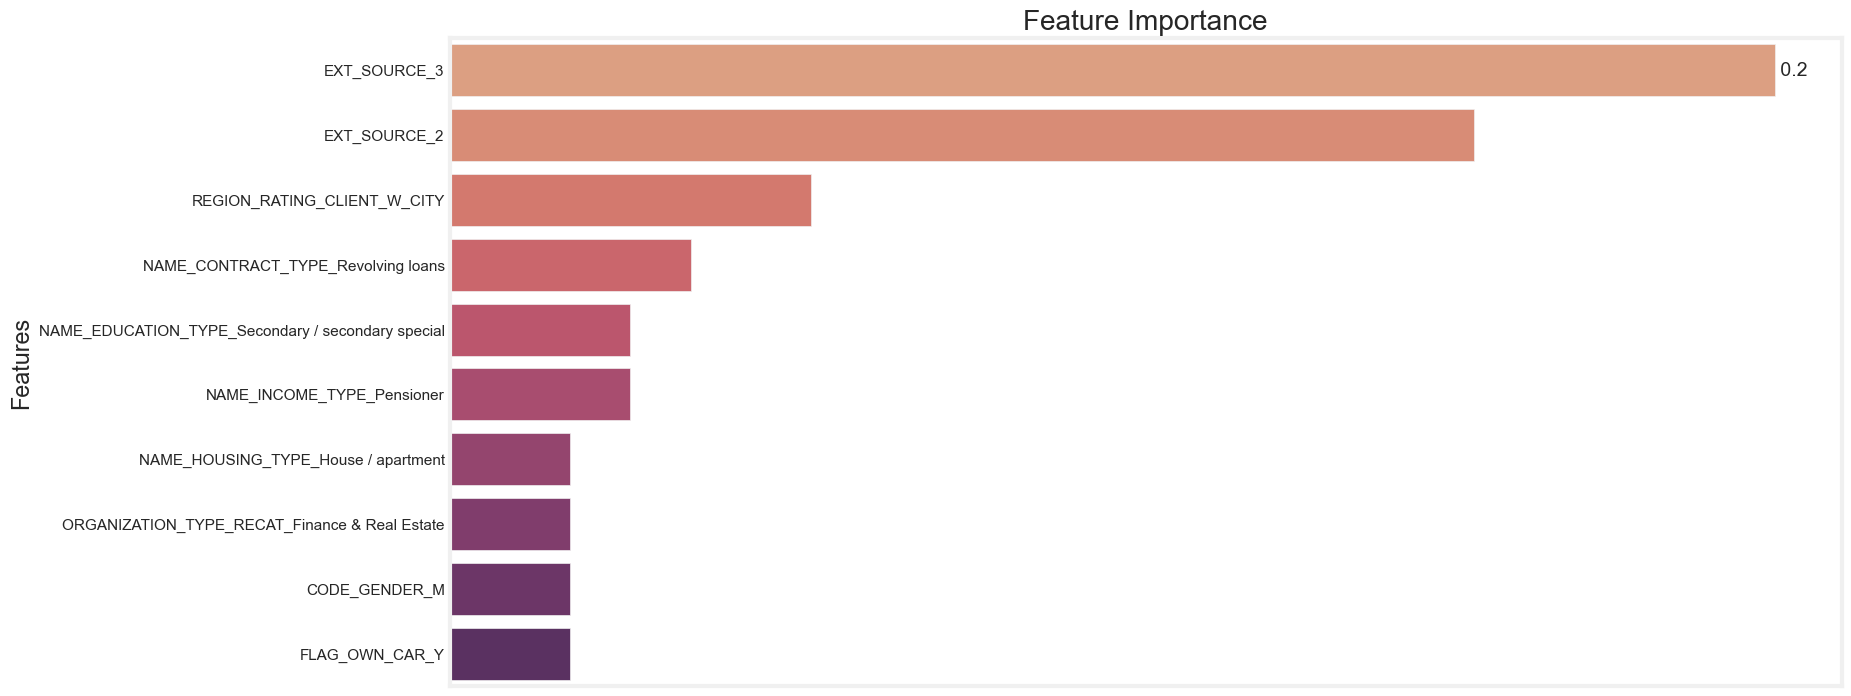

In [143]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax_imp_fts = sns.barplot(y='Feature', x='Normalized Importance',data=feature_importance, palette='flare', orient='horizontal')

plt.bar_label(ax_imp_fts.containers[0], fmt=' %.1f')
#plt.xlim(0,1.1)
plt.xlabel('')
plt.xticks([])
plt.ylabel('Features')
plt.title('Feature Importance')

plt.show()

#### INSIGHT:
- 10 column shows the highest importance value, which suggest that these columns are likely to be the highest determining factor in predicting visitor as potential buyer as the target features.
- Features in the top 10 for feature importance, as well as those outside of it, will be re-categorized into categories matching the factors used in the FICO credit scoring method. Based on this categorization, weights will also be assigned to each category based on their importance and impact on the target variable.

## Credit Scoring
- Coefficients will be used to act weight for each categories.
- Data will be normalized to avoid skewing.

In [117]:
fico_categories = {
    "Payment History": ["DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE", "NAME_CONTRACT_TYPE_Revolving loans", "FLAG_OWN_REALTY_Y"],
    "Amounts Owed": ["EXT_SOURCE_2", "EXT_SOURCE_3", "FLAG_OWN_CAR_Y"],
    "Length of Credit History": ["AGE_encoded", "EMP_TENURE_encoded"],
    "Credit Mix": ["CODE_GENDER_M", "REGION_RATING_CLIENT_W_CITY", "OCCUPATION_TYPE_White-Collar", "CNT_CHILDREN_encoded"],
    "New Credit": ["WEEKDAY_APPR_PROCESS_START_encoded"],
    
    # Additional Categories (features that are not quite right for FICO categorization)
    "Income Stability": ["NAME_INCOME_TYPE_Other", "NAME_INCOME_TYPE_Pensioner", "NAME_INCOME_TYPE_State servant", "NAME_INCOME_TYPE_Working"],
    "Education Level": ["NAME_EDUCATION_TYPE_Higher education", "NAME_EDUCATION_TYPE_Incomplete higher", "NAME_EDUCATION_TYPE_Lower secondary", "NAME_EDUCATION_TYPE_Secondary_secondary special"],
    "Family Situation": ["NAME_FAMILY_STATUS_Married", "NAME_FAMILY_STATUS_Separated", "NAME_FAMILY_STATUS_Single / not married", "NAME_FAMILY_STATUS_Widow", "NAME_TYPE_SUITE_Family", 
                         "NAME_TYPE_SUITE_Group of people", "NAME_TYPE_SUITE_Other_A", "NAME_TYPE_SUITE_Other_B", "NAME_TYPE_SUITE_Spouse_partner", "NAME_TYPE_SUITE_Unaccompanied"],
    "Housing Stability": ["NAME_HOUSING_TYPE_House / apartment", "NAME_HOUSING_TYPE_Municipal apartment", "NAME_HOUSING_TYPE_Office apartment", "NAME_HOUSING_TYPE_Rented apartment", "NAME_HOUSING_TYPE_With parents"],
    "Employment Sector": ["ORGANIZATION_TYPE_RECAT_Arts, Culture & Media", "ORGANIZATION_TYPE_RECAT_Construction & Industry", "ORGANIZATION_TYPE_RECAT_Education & Training", "ORGANIZATION_TYPE_RECAT_Finance & Real Estate", 
                          "ORGANIZATION_TYPE_RECAT_Healthcare", "ORGANIZATION_TYPE_RECAT_Hospitality & Food Services", "ORGANIZATION_TYPE_RECAT_Other", "ORGANIZATION_TYPE_RECAT_Personal Services", 
                          "ORGANIZATION_TYPE_RECAT_Public Sector & Government", "ORGANIZATION_TYPE_RECAT_Technology & Telecom", "ORGANIZATION_TYPE_RECAT_Trade & Retail", "ORGANIZATION_TYPE_RECAT_Transportation & Logistics"],
    "Regional Context": ["REGION_POPULATION_RELATIVE", "EMERGENCYSTATE_MODE_Yes"]
}

dynamic_weights = {}
for category, features in fico_categories.items():
    valid_coeffs = [abs(logreg_coefficients[feature]) for feature in features if feature in logreg_coefficients]
    if valid_coeffs:
        dynamic_weights[category] = sum(valid_coeffs)

total_weight = sum(dynamic_weights.values())
dynamic_weights = {key: val / total_weight for key, val in dynamic_weights.items()}

# Normalize data
def preprocess_data(X):
    X_processed = X.copy()
    bool_cols = X_processed.select_dtypes(include='bool').columns
    X_processed[bool_cols] = X_processed[bool_cols].astype(int)
    
    num_cols = X_processed.select_dtypes(include='number').columns
    for col in num_cols:
        col_min = X_processed[col].min()
        col_max = X_processed[col].max()
        if col_max - col_min > 0:
            X_processed[col] = (X_processed[col] - col_min) / (col_max - col_min)
    
    return X_processed

X_normalized = preprocess_data(X_test_enc)

# Credit score calculation based on Logistic Regression's Coefficients
def map_to_score_with_coefficients(X_normalized, fico_categories, weights, logreg_coefficients):
    scores = np.zeros(len(X_normalized))
    
    for category, features in fico_categories.items():
        valid_features = [feature for feature in features if feature in X_normalized.columns]
        if valid_features:
            feature_scores = X_normalized[valid_features] * [logreg_coefficients[feature] for feature in valid_features]
            category_scores = feature_scores.mean(axis=1) * weights[category]
            scores += category_scores

    # FICO credit score range
    min_score = scores.min()
    max_score = scores.max()
    scaled_scores = 300 + (scores - min_score) / (max_score - min_score) * 550
    
    return scaled_scores.astype(int)

credit_scores_with_coefficients = map_to_score_with_coefficients(X_normalized, fico_categories, dynamic_weights, logreg_coefficients)

In [118]:
test_data_df = X_test_alt.copy()
test_data_df['CREDIT_SCORE'] = credit_scores_with_coefficients

In [119]:
test_data_df.head(5)

,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,EMERGENCYSTATE_MODE,AGE,EMP_TENURE,ORGANIZATION_TYPE_RECAT,AMT_CREDIT,CREDIT_SCORE
306973,0.032561,11.054795,7.484932,1,0.629154,0.065993,0.000000,Revolving loans,F,N,Y,No Children,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Blue-Collar,FRIDAY,No,41-55 Years old,Long,Finance & Real Estate,180000.0,522
164281,0.015221,27.572603,1.528767,2,0.122961,0.510542,0.000000,Cash loans,F,N,Y,1 Children,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,Blue-Collar,WEDNESDAY,No,41-55 Years old,Long,Trade & Retail,170640.0,543
202371,0.072508,5.676712,12.063014,1,0.646604,0.713631,1.019178,Revolving loans,F,N,Y,1 Children,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Blue-Collar,TUESDAY,No,31-40 Years old,Medium,Construction & Industry,270000.0,757
144372,0.018850,14.791781,10.104110,2,0.686114,0.856413,0.572603,Revolving loans,F,N,N,2-3 Children,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Blue-Collar,THURSDAY,No,41-55 Years old,Medium,Trade & Retail,270000.0,803
82017,0.018634,8.339726,9.287671,2,0.747259,0.392774,6.901370,Revolving loans,F,N,N,No Children,Family,Working,Secondary / secondary special,Single / not married,Rented apartment,Blue-Collar,SUNDAY,No,31-40 Years old,Long,Trade & Retail,337500.0,678


In [120]:
for index, rows in test_data_df.iterrows():
    if rows['CREDIT_SCORE'] <= 579:
        test_data_df.at[index, 'credit_score_categories'] = 'Poor (300-579)'
    elif rows['CREDIT_SCORE'] <= 669:
        test_data_df.at[index, 'credit_score_categories'] = 'Fair (580-669)'
    elif rows['CREDIT_SCORE'] <= 739:
        test_data_df.at[index, 'credit_score_categories'] = 'Good (670-739)'
    elif rows['CREDIT_SCORE'] <= 799:
        test_data_df.at[index, 'credit_score_categories'] = 'Very good (740-799)'
    else:
        test_data_df.at[index, 'credit_score_categories'] = 'Excellent (800-850)'

In [121]:
test_data_df['credit_score_categories'].value_counts()

credit_score_categories
Good (670-739)         21233
Fair (580-669)         19604
Poor (300-579)         10897
Very good (740-799)     8903
Excellent (800-850)      866
Name: count, dtype: int64

In [122]:
df_grp_score = test_data_df.groupby('credit_score_categories').agg(cust_cnt=('CODE_GENDER','count')).sort_values('cust_cnt', ascending=False)
df_grp_score.reset_index(inplace=True)

df_grp_score['percentage'] = round(df_grp_score['cust_cnt']/df_grp_score['cust_cnt'].sum()*100,2)

In [123]:
df_grp_score

,credit_score_categories,cust_cnt,percentage
0,Good (670-739),21233,34.52
1,Fair (580-669),19604,31.87
2,Poor (300-579),10897,17.72
3,Very good (740-799),8903,14.48
4,Excellent (800-850),866,1.41


In [124]:
y_test.value_counts()

TARGET
1    56538
0     4965
Name: count, dtype: int64

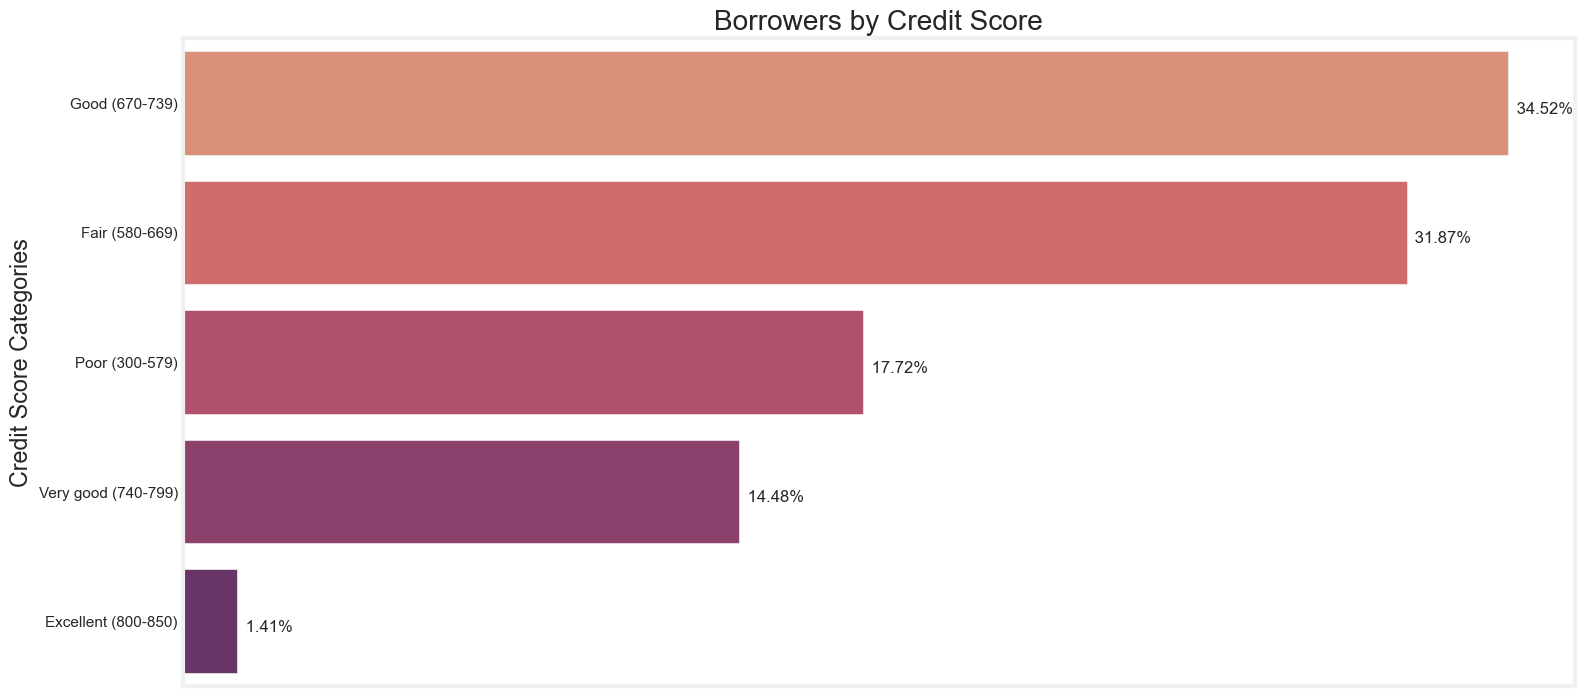

In [136]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax_credit_score = sns.barplot(y='credit_score_categories', x='percentage',data=df_grp_score, palette='flare', orient='horizontal')

pt.get_text_horz(ax_credit_score, 0.1, 1.8, 12, 'all')
#plt.xlim(0,1.1)
plt.xlabel('')
plt.xticks([])
plt.ylabel('Credit Score Categories')
plt.title('Borrowers by Credit Score')

plt.show()

### INSIGHT:
- The company should aim for borrowers with credit scores in the range of 670 - 850 (good to excellent). This will ensure that approved borrowers are safer options and that there’s less chance for the loans to end up as bad loans. The combined percentage in these categories accounts for more than 50%, indicating that at least half of the borrower base is considered a safer option and should pose less risk for the company as a lender.
- Borrowers with fair credit scores (580-669) make up the largest portion among the remaining categories, suggesting that although borrowers in these categories are considered riskier options, at least more than 1 in 4 of these borrowers may still be considered to have potential despite some trade-offs or higher risk.

In [126]:
def text_warn(x_val, y_val, text='This loan is risky'):
    plt.text(x=x_val, y=y_val, s=text, 
    fontsize=16, color='red',va='center',weight='bold')

def line_range(x_val_start, x_val_end, area_range_val):
    plt.axvline(x= x_val_start, ls='--', color='red')
    plt.axvline(x= x_val_end, ls='--', color='red')
    plt.stackplot(np.arange(area_range_val[0], area_range_val[1]),[[25000]], color='red', alpha=0.1)

In [127]:
credit_score_order = ['Poor (300-579)','Fair (580-669)','Good (670-739)','Very good (740-799)','Excellent (800-850)']

In [128]:
def visualize_performance(df, feature_start, feature_end, linex, liney, linelist, textx, texty,*args):
    from matplotlib import style
    
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize = (20, 12))

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    #plot data
    sns.barplot(data = df, x=feature_end, 
                y='bad_loan_rate', hue='credit_score_categories', 
                hue_order=credit_score_order, orient='v', palette='OrRd', ci=None)
    
    #axvline1
    line_range(linex, liney, [linelist[0],linelist[1]])
    text_warn(textx, texty)

    for func in args:
        func()
    
    avg_bad_val = df[df['credit_score_categories']=='Poor (300-579)']['bad_loan_rate'].mean()
    max_bad_val_lim = round(df[df['credit_score_categories']=='Poor (300-579)']['bad_loan_rate'].max()+3)
    
    plt.axhline(avg_bad_val, color='#F7CA77', linestyle='--', linewidth=2, label=f'Average bad loan rate (Poor): {round(avg_bad_val, 2)}%')
    plt.ylim(0,max_bad_val_lim)
    
    #title
    plt.title(f"Bad Loan Rate on Credit Ammount \nBased on Borrower's Score Status",
              fontsize=18, weight ='extra bold')
    
    #show percentage
    plt.bar_label(ax.containers[0], fmt='%.1f%%')
    plt.bar_label(ax.containers[1], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[2], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[3], fmt='%.1f%%', fontsize=10)
    plt.bar_label(ax.containers[4], fmt='%.1f%%', fontsize=10)
    
    #label axis
    plt.xlabel('Credit Ammount', fontsize=14)
    plt.ylabel('Bad Loan Rate (%)', fontsize=14)
    plt.yticks([])
    
    #legend
    plt.legend(title='Status', loc='upper right')
    plt.show()

In [129]:
def bad_loan_rate(target_feature, feature_end):
    df_cust = test_data_df.groupby(['credit_score_categories',target_feature,feature_end]).agg(num_cust= ('CODE_GENDER','count')).reset_index()
    df_total_cust = test_data_df.groupby(feature_end).agg(total_cust = ('CODE_GENDER','count')).reset_index()

    df_loan_group = df_cust.merge(df_total_cust, on=feature_end, how='inner')
    
    df_bad_loan = df_loan_group[df_loan_group[target_feature] == 'Bad loan']
    df_bad_loan['bad_loan_rate'] = round((df_bad_loan['num_cust'] / df_bad_loan['total_cust'])*100, 2)
    df_bad_loan = df_bad_loan.sort_values('bad_loan_rate', ascending=False)

    return df_bad_loan
    
df_check_range = pd.DataFrame()
def credit_performance(feature_start, feature_end, linex, liney, linelist, textx, texty, *args):
    val_max = X_test_alt[feature_start].max()
    val_min = X_test_alt[feature_start].min()
    
    test_data_df[feature_end] = pd.cut(X_test_alt[feature_start], bins=np.linspace(val_min, val_max, num=11), precision=2, include_lowest=True)
    test_data_df[feature_end] = test_data_df[feature_end].astype(str).str.replace('[(\]]', '', regex=True).str.replace(',', ' -')

    features_list = [val for val in test_data_df]
    target_feature = 'loan_status'
    
    if target_feature not in features_list:
        test_data_df['loan_status'] = y_test.apply(lambda x: 'Good loan' if x==1 else 'Bad loan')

    df_check_range = pd.DataFrame({feature_end:test_data_df[feature_end].unique()})

    df_bad_loan_rate = bad_loan_rate(target_feature, feature_end)

    visualize_performance(df_bad_loan_rate, feature_start, feature_end, linex, liney, linelist, textx, texty,*args)

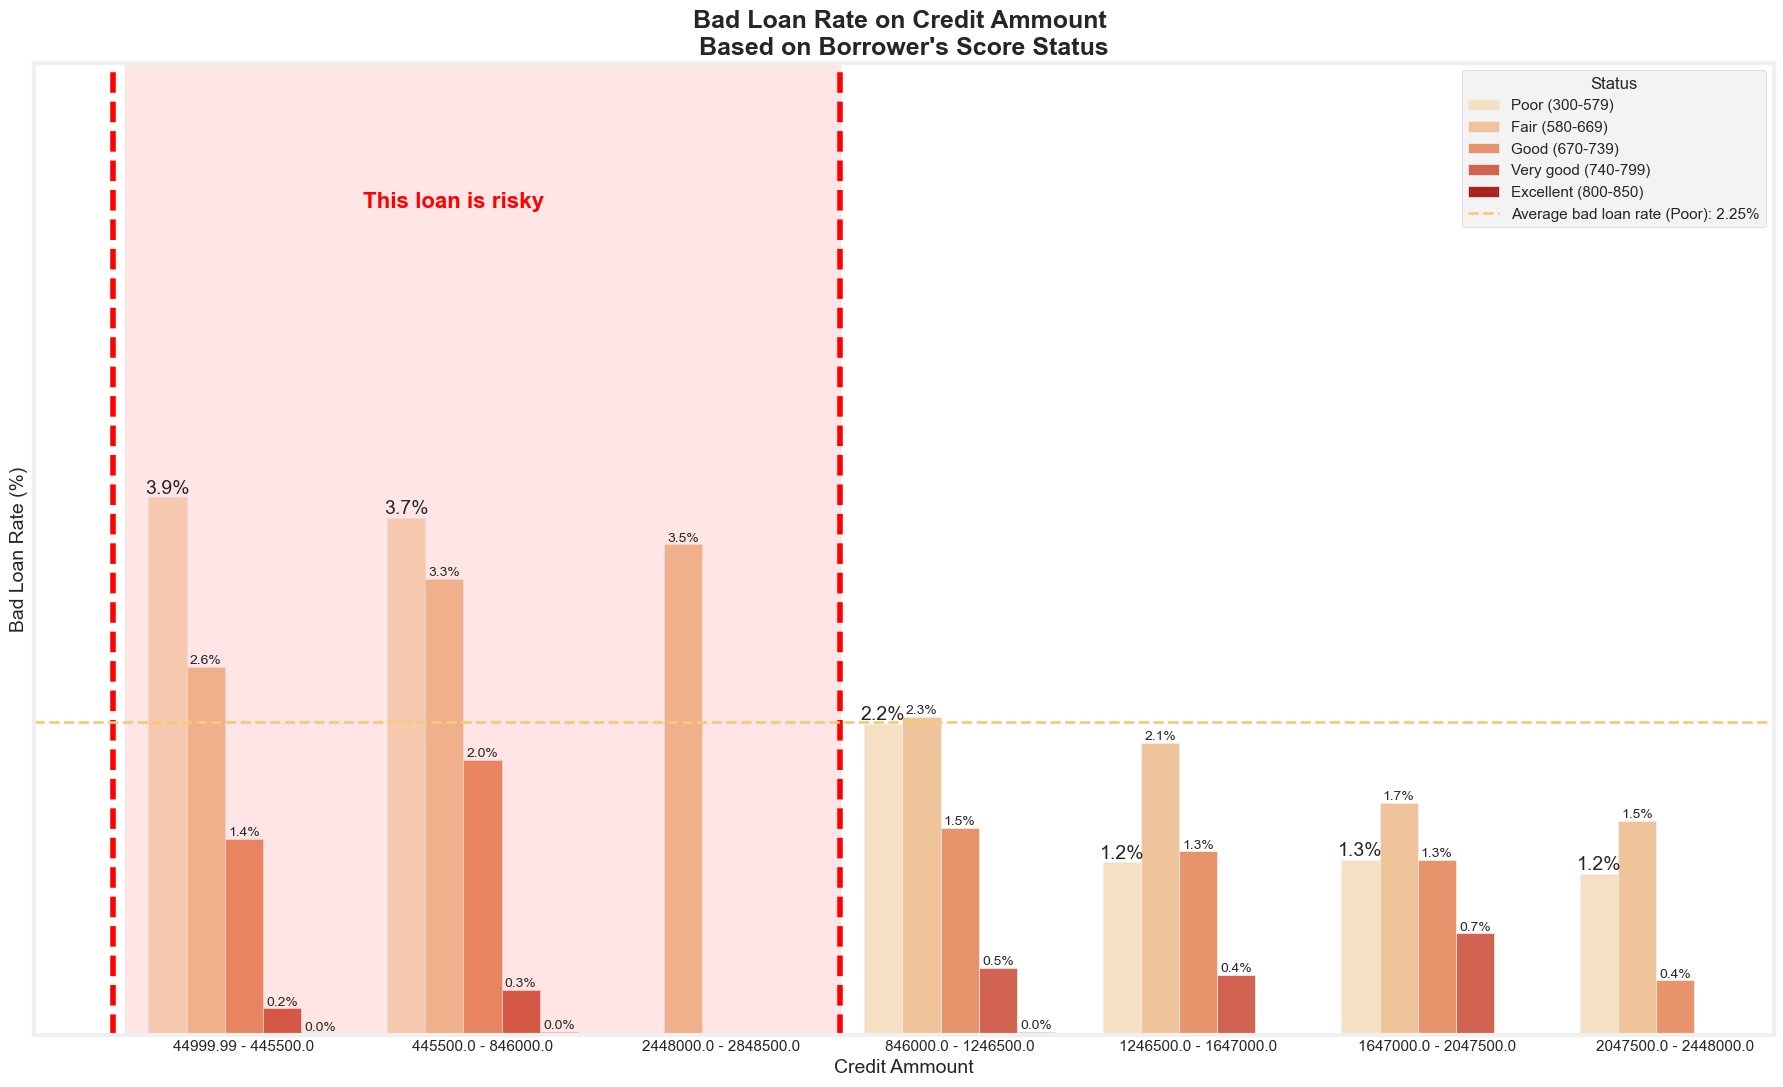

In [142]:
credit_performance('AMT_CREDIT', 'AMT_CREDIT_RANGE', -0.55, 2.5, [-0.5,3.5], 0.5, 6)

### INSIGHT:
- Borrowers whose credit amounts range from 44,999 to 846,000 and from 2,448,000 to 2,848,500 tend to fall into the lower credit score categories. This is evident as the percentage of borrowers with poor and fair credit scores exceeds the average for these categories. This suggests that these credit amount ranges should prompt stricter approval criteria, as they are more likely to be populated by borrowers with either poor or fair credit scores, making them a potentially higher risk.
- The safer ranges of credit amounts for borrowers tend to fall within the mid to higher credit ranges, which show a more balanced distribution across each credit score category. This suggests that borrowers within this credit range are less likely to experience payment difficulties and end up with bad loans, making them more preferable for approval.

## Business recommendation COPY

- **Prioritize Cash Loans**, Given the high demand, the company should continue to focus on cash loans. The company should also try to improve the popularity of revolving loans which can be supported by offering incentives to borrowers.
- **Risk-Based Pricing**, The company should implement a risk-based pricing strategy, charging higher interest rates for riskier borrowers. The company should also focus its underwriting and approval processes on the lower credit score categories, especially borrowers with fair credit scores, as they make up more than one-fourth of the borrower base and are the largest portion of the lower credit score category. These borrowers may still have potential to result in good loans, though they carry higher risk which should be factored into approval criteria and loan terms. This approach would help balance the risk the company takes if borrowers in these categories are approved.
- **Targeted Marketing Based on Gender**, Given that female borrowers make up the majority and have a high repayment success rate, the company might benefit from creating campaigns or incentives tailored to female borrowers, such as loyalty rewards for consistent repayment or bonuses for early payment.
- **Targeted Approval Based on Credit**, Because of credit ammount in the mid to higher ranges appear to have a more balanced distribution across credit score categories. The company should focus on approving borrowers within this "sweet spot" credit amount range, as they are less likely to experience payment difficulties.
- **Portfolio Rebalancing**, By adjusting the approval criteria, the company should gradually shift the loan portfolio toward a higher proportion of borrowers with good or better credit scores, focusing efforts on reducing the percentage of poor and fair credit score borrowers over time.